<h1 style="text-align: center;">Bayesian Methods in A/B Testing</h1>
<h1 style="text-align: center;">DSCO23, Data Institute, University of San Francisco</h1>

$\;$

<table><tr>
<td> <img src="di_logo.png" alt="DI_Logo" style="height: 200px;"/> </td>
<td> <img src="101_howard.jpeg" alt="UW_Logo" style="height: 200px;"/> </td>
</tr></table>

$\;$

## Overview and Learning Objectives

A/B testing has become a ubiquitous method for testing and evaluating product changes in the tech industry. Companies with a culture of experimentation and a “test everything” philosophy commonly run hundreds of experiments per day, engaging millions of users. The statistical framework for A/B testing is consistent with randomized controlled experiments: users are randomly assigned to different variants (of a product, ad, promotion, etc.), data is collected on each user, and these observations are used to compare among the variants. Such comparisons are commonly carried out using traditional frequentist methods like hypothesis tests and p-values. However, the comparisons of interest and the available data both lend themselves naturally to Bayesian methods of statistical inference. Accordingly, the use of Bayesian methods in A/B testing is a growing trend, and the focus of this short course. The learning outcomes for the course are the following. Participants can expect to become familiar with 

* the shortcomings of traditional frequentist methods (e.g., misuse and misunderstanding of p-values);
* the basics of Bayesian inference (e.g., Bayes rule, prior distributions, posterior distributions); and
* the manner in which Bayesian methods are being used in industry for A/B testing. In particular, how tools like Bayes factors, posterior probabilities, and credible intervals, may be used to inform both the design and analysis of these experiments.

$\;$

## About Your Instructor

[Nathaniel Stevens](https://uwaterloo.ca/scholar/nstevens) is an Assistant Professor of Statistics at the University of Waterloo (UW) in the Department of Statistics and Actuarial Science, and he is the Director of the BMATH and BCS in Data Science programs. Prior to this, Nathaniel held a faculty position at the University of San Francisco (USF) where he was jointly appointed in the Department of Mathematics and Statistics as well as the MS in Data Science program. In this time he served as Program Director for their BS in Data Science program and offered consulting and training through the Data Institute. Before that, Nathaniel earned BMATH, MMATH, and PhD degrees in Statistics from the University of Waterloo. 

<table><tr>
<td> <img src="uw_crest.png" alt="DI_Logo" style="height: 200px;"/> </td>
<td> <img src="uw_campus.jpeg" alt="UW_Logo" style="height: 200px;"/> </td>
</tr></table>

Having overseen 30+ data science internships at 20+ companies, Nathaniel is interested in using statistics to solve practical problems, and he has a passion for inspiring and training students to do the same. His research interests lie at the intersection of data science and industrial statistics; his publications span topics including experimental design and A/B testing, social network modeling and monitoring, survival and reliability analysis, measurement system analysis, and the development of estimation-based alternatives to traditional hypothesis testing.

## What is an A/B Test?

* The Scientific Method is based on skepticism and empiricism.

* Experimentation is key to the Scientific Method, and is necessary for understanding the world around us. 

* Historically, experiments have been used in fields such agriculture, manufacturing, physical sciences, social sciences, and medicine.

* Recently, the utility of controlled experiments has been recognized within internet and technology companies, where online controlled experiments are a means to optimize products, customer customer experience, and revenue.

* In an environment of economic Darwinism, experimentation is key if businesses want to remain competitive [[1]](https://www.amazon.com/Experimentation-Works-Surprising-Business-Experiments/dp/163369710X).

* The “Big Five” tech organizations (Google, Amazon, Meta, Apple, and Microsoft) are each running 10,000+ experiments per year engaging millions of users [[2]](https://hbr.org/2017/09/the-surprising-power-of-online-experiments)[[3]](https://www.amazon.com/Trustworthy-Online-Controlled-Experiments-Practical/dp/1108724264). 

    * LinkedIn reportedly runs 400+ simultaneous experiments per day [[4]](https://dl.acm.org/doi/abs/10.1145/2783258.2788602).

* 1000’s of companies use tools such as Optimizely, Google Optimize, Mixpanel, VWO, AB Tasty, and Split.io to run experiments.
        
$\;$

**So what exactly is an A/B test and how does it work?**

In a classic A/B test, two groups of experimental units (usually users) are randomized to one of two variants (usually different versions of a product), and the data collected in each variant provide information about which product version is superior.

<img src="ab-testing.png" style= “center” width="500">

$\;$

**Concrete Examples:**

* [Amazon](https://goodui.org/leaks/amazon-a-b-tests-and-rolls-out-product-reassurances/) experiments with purchase reassurances

* [Airbnb](https://goodui.org/leaks/airbnb-once-again-rejects-next-available-date-suggestions/) experiments with next available date feature

* [The New York Times](https://blog.tjcx.me/p/new-york-times-ab-testing) experiments with article headlines

* [Lyft](https://eng.lyft.com/a-b-tests-for-lyft-hardware-570330b488d4) experiments with the hardware and software on their eBikes

* [eHow](https://www.optimizely.com/insights/ehow/) experiments with ad placement

* [Google’s](https://www.theguardian.com/technology/2014/feb/05/why-google-engineers-designers) infamous 41 shades of blue experiment reportedly increased annual revenue by \$200M.

* [Bing](https://hbr.org/2017/09/the-surprising-power-of-online-experiments) generated an additional $100M in annual revenue by changing the way the search engine displayed ad headlines.

* [Amazon](https://hbr.org/2017/09/the-surprising-power-of-online-experiments) boosted profits by tens of millions per year by moving their credit card offers from the homepage to the checkout page.

* [Netflix](https://netflixtechblog.com/its-all-a-bout-testing-the-netflix-experimentation-platform-4e1ca458c15) attributes its membership growth from 2 countries to over 190 in the span of just 6 years to its adoption of online controlled experimentation

* [Duolingo’s](https://investors.duolingo.com/static-files/ae55dd31-2ce4-41ac-bb26-948bafe8409c) 2022 Q2 shareholder letter attributes their growth to an “A/B test everything” mentality

For more examples, see the [Optimizely Case Studies](https://www.optimizely.com/insights/the-big-book-of-experimentation/) or the [GoodUI Leaks](https://goodui.org/leaks/).

$\;$ 

## Motivating Example

[<img src="RR_AB_test.png" width="500" style= “center”>](https://youtu.be/OW_OId8aaM4)

In this video we learn that "Test B", the ad without Ryan led to a conversion rate of 1.61\% which was a 117\% improvement over "Test A", the ad with Ryan. These values indicate observed conversion rates of $0.0074$ and $0.0161$. Clearly these values are different, but are they sufficiently different that we should believe that the true probabilities of conversion in each ad are different? These are the kinds of questions were going to try to answer today.


## Review of Frequentist Methods

Denote the data by $Y$ which we assume follows some distribution $f$ that depends on some parameter(s) of interest $\theta\in\Omega$. We write this as $$Y|\theta\sim f(y|\theta).$$ 

We translate a hypothesis about the world into a statistical hypothesis about $\theta$: $$H_0:\theta\in\Omega_0 \text{ vs. } H_1:\theta\in\Omega\setminus\Omega_0$$ 

Here $H_0$ is the *null hypothesis* and $H_1$ is the complementary *alternative hypothesis*. On the basis of the observed data $Y$ we want to determine which of these statements seems more reasonable. We do this with a *null hypothesis significance test* (NHST).

Common to all NHSTs, we calculate a *test statistic*, denoted $t$, that

* is a function of the data $Y$, and 
* is a function of $\theta$, and
* has a distribution under $H_0$ (referred to as the *null distribution*) that does not depend on $\theta$, and 
* is defined so that extreme values give evidence against $H_0$.

In an A/B test we have two *different* parameter values $\theta_A$ and $\theta_B$ giving rise to two different data distributions $f(y|\theta_A)$ and $f(y|\theta_B)$. In this setting, interest lies in comparing these distributions through $\theta_A$ and $\theta_B$. Specifically, depending on the context, one of the following three hypotheses will be of interest:

$$H_0:\theta_A=\theta_B \text{ vs. } H_1:\theta_A\neq\theta_B$$

$$H_0:\theta_A\leq\theta_B \text{ vs. } H_1:\theta_A>\theta_B$$

$$H_0:\theta_A\geq\theta_B \text{ vs. } H_1:\theta_A<\theta_B$$

Relevant test statistics in this context are functions of the data $\{y_{A,1},y_{A,2},\ldots,y_{A,n_A}\}$ and $\{y_{B,1},y_{B,2},\ldots,y_{B,n_B}\}$ typicaly through the parameter estimates $\hat\theta_A$ and $\hat\theta_B$. For instance, the test statistic for the Welch $t$-test is $$t = \frac{\hat\theta_A-\hat\theta_B}{\sqrt{\frac{\hat\sigma_A^2}{n_A}+\frac{\hat\sigma_B^2}{n_B}}}$$ where $\hat\theta_i = \frac{1}{n_i}\sum_{j=1}^{n_i}y_{i,j}$ and $\hat\sigma_i^2=\frac{1}{n_i-1}\sum_{j=1}^{n_i}(y_{i,j}-\hat\theta_i)^2$ for $i\in\{A,B\}$. 

And for the Student $t$-test we have $$t = \frac{\hat\theta_A-\hat\theta_B}{\sqrt{\frac{\hat\sigma^2}{n_A}+\frac{\hat\sigma^2}{n_B}}}$$ where $\hat\sigma^2$ is the pooled variance $\frac{(n_A-1)\hat\sigma_A^2+(n_B-1)\hat\sigma_B^2}{n_A+n_B-2}$. 

In the case of the $Z$-test for proportions the form of the test statistic is the same as that of the Student $t$-test: $$t = \frac{\hat\theta_A-\hat\theta_B}{\sqrt{\frac{\hat\sigma^2}{n_A}+\frac{\hat\sigma^2}{n_B}}}$$ except in this case $\hat\sigma^2 = \hat\theta(1-\hat\theta)$ where $\hat\theta$ is the overall conversion rate $\frac{n_A\hat\theta_A+n_B\hat\theta_B}{n_A+n_B}$.

In all cases, the extremity of the observed test statistic $t$ is evaluated in the context of the null distribution; extreme values provide evidence against $H_0$ and non-extreme values do not. The extremity of the test statistic is formally quantified with the *p-value*, the probabilty of observing a value of the test statistic at least as extreme as what *was* observed, if $H_0$ were true. The smaller the p-value, the more evidence against $H_0$.

Although not widely agreed upon, the following table provides a categorization of p-values that aids in their interpretation.

| Values of p  | Strength of Evidence Againts H<sub>0</sub>                      |
|:-------------:|:-----------------------------------:|
| p>0.10       | Little or no evidence against H<sub>0</sub> |
| 0.05<p<0.10  | Weak evidence against H<sub>0</sub>         |
| 0.01<p<0.05  | Evidence against H<sub>0</sub>              |
| 0.001<p<0.01 | Strong evidence against H<sub>0</sub>       |
| p<0.001      | Very Strong evidence against H<sub>0</sub>  |

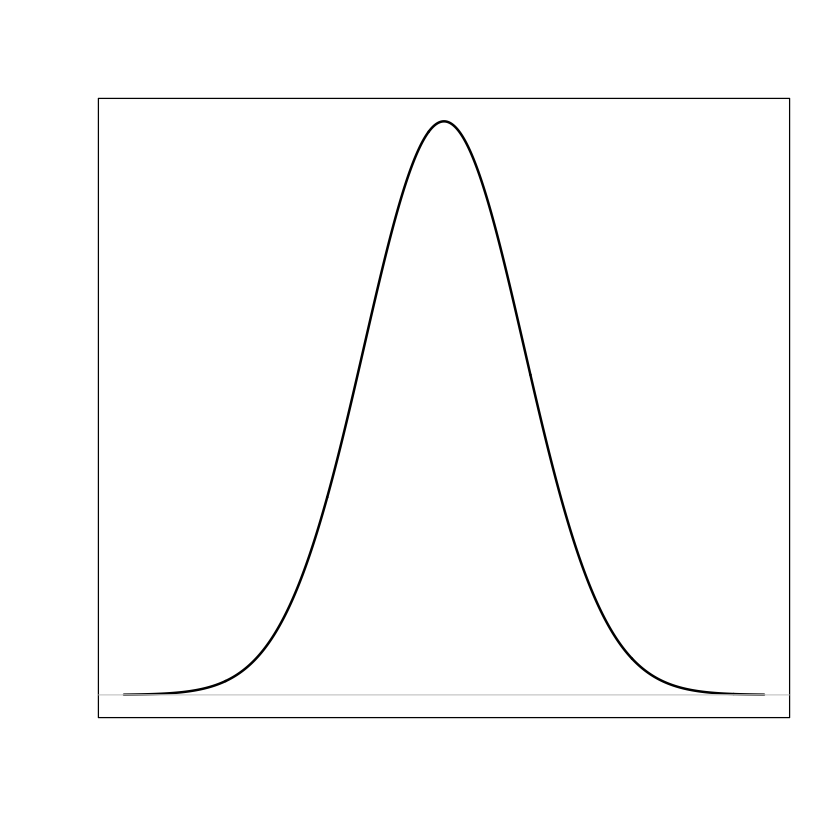

In [87]:
plot(x = seq(-4,4,0.01), y = dnorm(x = seq(-4,4,0.01)), type = "l", lwd = 2,
     main = "", xlab = "", ylab = "", xaxt = "n", yaxt = "n")
abline(h = 0, col = "lightgrey")
# t=1
# segments(x0 = t, y0 = 0, x1 = t, y1 = dnorm(t), lwd = 2, col = "red")
# polygon(c(seq(t,4,0.01), 4, t), c(dnorm(seq(t,4,0.01)),0,0), col="red")
# legend("topright", bty = "n", pch = 15, col = "red",
#       legend = paste0("p-value = ", round(pnorm(t, lower.tail = FALSE),4)))

### Example: Ryan Reynolds A/B Test

Let's analyze the Ryan Reynolds A/B test using traditional frequentist methods. Recall, the observed conversion rates were $\hat\theta_A=0.0074$ and $\hat\theta_B=0.0161$. Previously, we acknowledged that $\hat\theta_A\neq\hat\theta_B$, but we wondered whether this implied $\theta_A\neq\theta_B$. We're now going to make a decision about this using a NHST. 

The video did not state the sample sizes in each group, so for illustration we will simply assume $n_A=n_B=10,000$. Thus we have $74$ and $161$ conversions in Test A and B respectively. Let's create some data to correspond to this situation.

In [88]:
nA = 10000
nB = 10000
yA = sample(x = c(rep(1,74), rep(0,nA-74)), size = nA, replace = FALSE)
yB = sample(x = c(rep(1,161), rep(0,nB-161)), size = nB, replace = FALSE)

Let's now visualize this data with a stacked bar chart.

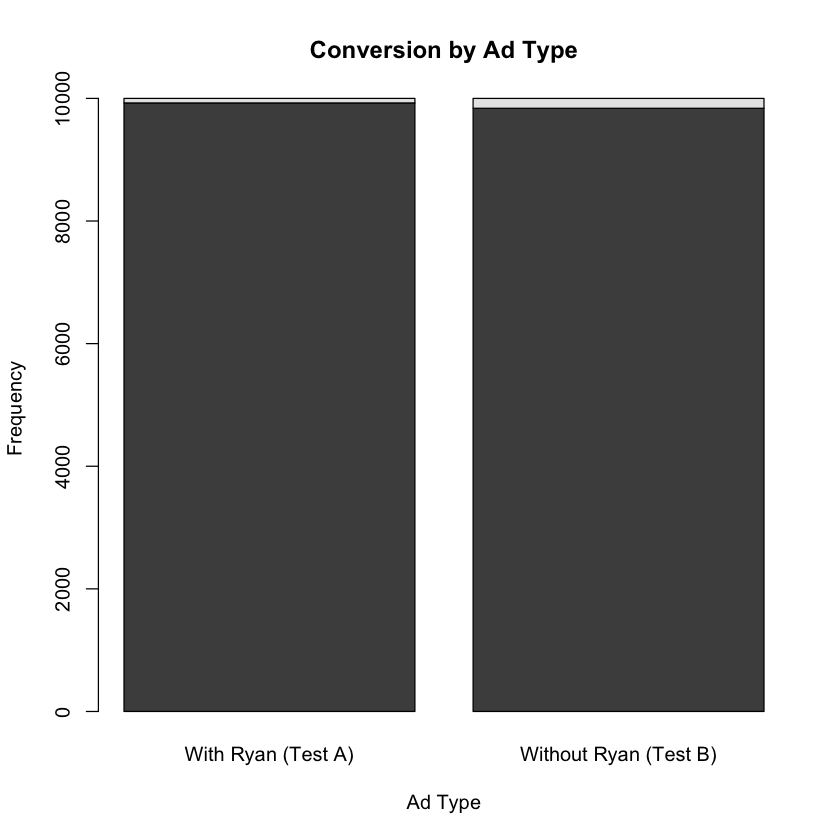

In [89]:
tab = table(c(yA,yB), c(rep("A", nA), rep("B", nB)))
barplot(tab, xlab = "Ad Type", ylab = "Frequency", xaxt = "n", main = "Conversion by Ad Type",
        args.legend = c("bottom", bty = "n"))
axis(side = 1, at = c(0.7, 1.9),
     labels = c("With Ryan (Test A)", "Without Ryan (Test B)"), tick = FALSE)

As is visualized above, and as was apparent by the observed conversion rates, the likelihood that someone converts is not the same for each ad. Indeed $\hat\theta_A-\hat\theta_B = -0.0087$. 

Clearly this value is different from zero, but what we'd like to decide is whether it's so far from 0 that we should believe $\theta_A-\theta_B\neq0$. The frequentist investigates questions of this nature using hypothesis tests and confidence intervals. In this setting, interest lies in testing $$H_0: \theta_A=\theta_B \text{ vs. } H_1:\theta_A \neq\theta_B$$ and calculating confidence intervals for $\theta_A-\theta_B$. Given the type of data we're dealing with, this is done in the context of the $Z$-test for proportions (or, equivalently, the $\chi^2$-test).

In [90]:
prop.test(x = c(sum(yA), sum(yB)), n = c(nA, nB), 
          alternative = "two.sided", correct = FALSE)


	2-sample test for equality of proportions without continuity correction

data:  c(sum(yA), sum(yB)) out of c(nA, nB)
X-squared = 32.591, df = 1, p-value = 1.137e-08
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.011684429 -0.005715571
sample estimates:
prop 1 prop 2 
0.0074 0.0161 


As we see from the output above, the p-value associated with this test is $1.137\times10^{-8}$. Such a small p-value indicates strong evidence against $H_0$. Likewise, we see that the 95\% confidence interval for $\theta_A-\theta_B$ is $(-0.011684429, -0.005715571)$ which is entirely negative, again suggesting that the conversion rates are indeed different.

### Limitations of NHST

Although widely used, NHSTs are also widely *misused*. This is predominantly due to the fact that NHSTs are misunderstood and carried out incorrectly. The problem is so dire that the American Statistical Association (ASA) released an [official statement](https://www.tandfonline.com/doi/full/10.1080/00031305.2016.1154108) challenging the statistical community to develop alternatives to, and adaptations of, the traditional
hypothesis testing framework. This led to *The American Statistician* publishing a [special
issue](https://www.tandfonline.com/toc/utas20/73/sup1) containing 43 articles that explore the shortcomings of traditional hypothesis testing and that discuss “moving to a world beyond p < 0.05”. 

Broadly speaking, the contributions in this special issue promote a holistic approach to decision-making that supplements or replaces p-values and traditional hypothesis tests with contextual information and with methodologies that emphasize estimation rather than hypothesis testing. The perpetual debate between proponents of frequentist and Bayesian methods is also at the forefront of this conversation. Many argue to replace, or at least supplement, traditional frequentist hypothesis testing with Bayesian methods.

Common issues associated with traditional NHSTs include:

* the interpretation of p-values and confidence intervals is unintuitive
* *statistical* and not *practical* significance is prioritized
* $H_0$ will always be rejected with enough data
* they don't easily incorporate prior information

As we will see, Bayesian methods effortlessly overcome these limitations.

## Bayesian Inference

In Frequentist Inference, a parameter $\theta$ is regarded as an unknown *constant* (a real number). Since we don't know its value, interest lies in estimating it from data. In the Ryan Reynolds example, the probability of conversion $\theta$ was of interest. We did't know the true value of such a probability, and in fact we can't know it's true value. However, given observed data, we can *estimate* it. We estimated this probability with the observed conversion rates in each variant: $\hat\theta_A=0.0074$ and $\hat\theta_B=0.0161$. Within the Frequentist paradigm the only source of randomness is in the data $Y$ (through some sampling mechanism).

A Bayesian takes a different philosophical approach to the study of parameters $\theta$. Central to Bayesian Inference is the assumption that a parameter $\theta$ is *not* a fixed constant, but instead a *random variable.* The Bayesian paradigm posits that there is randomness in both the data $Y$ *and also* the value of the parameter $\theta$. Whereas a probability statement such as $$\mathbb{P}(0.01 <\theta < 0.05)$$ 

is meaningless to a frequentist (since $\theta$ is a constant), such statements are routinely used by Bayesians to quantify plausible values for $\theta$. As we will see, this subtle difference in interpretation dramatically simplifies the interpretability of Bayesian methods, making them very appealing.

Within this paradigm, because we regard $\theta$ as a random variable, it is sensible to think about its probability distribution. Within this way of thinking, we distinguish between two versions of the distribution for $\theta$: the distribution we believe *before* observing any data, and the distribution we believe *after* observing data.

We define the *prior distribution*, denoted $p(\theta)$, as the distribution for $\theta$ that we believe before observing data $Y$. It reflects our prior understanding of the randomness in $\theta$. We write $$\theta\sim p(\theta).$$ 

This is to be contrasted with the *posterior distribution*, denoted $p(\theta|y)$, which is the distribution of $\theta$ *given* the observed data $Y$. Whereas the prior distribution reflect prior beliefs before collecting data, the poster distribition reflects updated beliefs derived once the data $Y$ have been observed. We write $$\theta|Y\sim p(\theta|y).$$ 

The manner in which we update our prior beliefs, taking us from $p(\theta)$ to $p(\theta|y)$ once the data $Y
\sim f(y|\theta)$ is observed, relies on Bayes' Rule, which we review next.

### Bayes' Rule: Definition

Given events $E_1$ and $E_2$, interest may lie in determining the probability that they occur, respectively denoted $\mathbb{P}(E_1)$ and $\mathbb{P}(E_2)$. Interest may also lie in determining the probability that one occurs, given that you know the other has already occured. Such a probability is called a *conditional* probability. 

The conditional probability that event $E_1$ occurs *given* that event $E_2$ has already occurred is denoted $$\mathbb{P}(E_1|E_2).$$ Likewise, the conditional probability of $E_2$ *given* $E_1$ is denoted $$\mathbb{P}(E_2|E_1).$$ 

$\;$

Bayes' Rule provides an expression for (i.e., a means for calculating) such conditional probabilties. By Bayes' Rule we have that $$\mathbb{P}(E_1|E_2) = \frac{\mathbb{P}(E_1 \text{ and } E_2)}{\mathbb{P}(E_2)}$$ and similarly that $$\mathbb{P}(E_2|E_1) = \frac{\mathbb{P}(E_2 \text{ and } E_1)}{\mathbb{P}(E_1)}.$$ 

$\;$

Because $\mathbb{P}(E_1 \text{ and } E_2) = \mathbb{P}(E_2 \text{ and } E_1)$, we see that one conditional probability can be defined in terms of the other: $$\mathbb{P}(E_1|E_2) = \frac{\mathbb{P}(E_2|E_1)\mathbb{P}(E_1)}{\mathbb{P}(E_2)}$$ and $$\mathbb{P}(E_2|E_1) = \frac{\mathbb{P}(E_1|E_2)\mathbb{P}(E_2)}{\mathbb{P}(E_1)}.$$

### Bayes' Rule: Exercise

Many methods of spam detection are based on words or features that appear much more frequently in spam than in regular email. Conditional probability methods may then be used to decide whether an email is spam or not. For example, suppose we define the following events associated with a random email message.
* $E_1 = \text{Spam} =$ *Message is spam*
* $E_1^c = \text{Not Spam} =$ *Message is not spam*
* $E_2 = \text{Viagara} =$ *Message contains the word Viagra*

If we know the values of the probabilities $\mathbb{P}(\text{Spam})$, $\mathbb{P}(\text{Viagra}|\text{Spam})$ and $\mathbb{P}(\text{Viagra}|\text{Not Spam})$, then we can find the probabilities $\mathbb{P}(\text{Spam}|\text{Viagra})$ and $\mathbb{P}(\text{Not Spam}|\text{Viagra})$.

From a study of email messages coming into a certain system, it is estimated that $\mathbb{P}(\text{Spam})=0.5$, $\mathbb{P}(\text{Viagra}|\text{Spam})=0.2$, and $\mathbb{P}(\text{Viagra}|\text{Not Spam})=0.001$. Find $\mathbb{P}(\text{Spam}|\text{Viagra})$ and $\mathbb{P}(\text{Not Spam}|\text{Viagra})$.

### Bayes' Rule: With Distribution Functions

It turns out the Bayes' Rule applies not just to probabilities, but also to probability *distribution functions*. For instance, if we're interested in the posterior distribution $p(\theta|y)$ (a *conditional* probability distribution), we have $$p(\theta|y) = \frac{L(y|\theta)p(\theta)}{f(y)}$$ 

where $p(\theta)$ is the prior distribution and $L(y|\theta) = \prod_{j=1}^nf(y_j|\theta)$ is the *likelihood* where $f(y|\theta)$ is the same data distribution we dealt with in the frequentist setting. 

The denominator $f(y)$ is a *normalizing constant*, a function of the data that is defined so that $p(\theta|y)$ is well-defined and integrates to 1: $$f(y) = \int_\theta L(y|\theta)p(\theta) d\theta.$$

Notationally, this normalizing constant is often ignored and the Bayes' Rule relation is often simplified and written as $$p(\theta|y) \propto L(y|\theta)p(\theta).$$

With the posterior $p(\theta|y)$ determined in this way, we have a means of probabilistically characterizing the plausible values for $\theta$. The inference for $\theta$ we will discuss here is carried out in the context of this distribution.

#### Example: Beta-Bernoulli Relation

Suppose that we observe *binary* data. That it is, $Y$ is composed entirely of 0's and 1's. Let $\theta = \mathbb{P}(Y=1)$ be the probability of observing a 1. It is common to model such data with the *Bernoulli* distribution. We write $$Y|\theta \sim \text{BIN}(1,\theta)$$ and the probability mass function is given by $$f(y|\theta) = \theta^y(1-\theta)^{1-y} ~~~ \text{for }0<\theta<1.$$ The corresponding likelihood is $$L(y|\theta) = \prod_{j=1}^nf(y_j|\theta) = \theta^{\sum y_j}(1-\theta)^{n-\sum y_j}.$$

Since we're now thinking like Bayesians, we also need a probability distribution to describe the randomness of $\theta$. A common choice for this is the *beta* distribution. We write $$\theta\sim \text{BETA}(\alpha,\beta)$$ 

where $\alpha$ and $\beta$ are parameters that govern the shape of the beta distribution. The corresponding probability density function is given by $$p(\theta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1} ~~~ \text{for } \alpha,\beta>0$$ where $\Gamma(\cdot)$ is the gamma function. 


Click the image below to visualize the beta distribution for a variety of $\alpha$ and $\beta$ values.

[<img src="beta_viz.png" width="750" style= “center”>](https://nathaniel-t-stevens.shinyapps.io/Beta_Distribution_Visualizer/)

These distributions respectively describe variation in the data, and also our prior beliefs about variation in the $\theta$ values. The posterior distribution is found using Bayes' Rule:

\begin{eqnarray}
p(\theta|y) &\propto& L(y|\theta)p(\theta) \\
&=& \theta^{\sum y_j}(1-\theta)^{n-\sum y_j} \times \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1} \\
&\propto& \theta^{\sum y_j+\alpha-1}(1-\theta)^{n-\sum y_j + \beta - 1}
\end{eqnarray}

The form of this function should look familiar; it resembles the beta distribution density function. In particular, it resembles the $$\text{BETA}\left(\alpha+\sum_{j=1}^n y_j, \beta + n + \sum_{j=1}^n y_j\right)$$ distribution. However, it doesn't look *exactly* like this distribution - we're missing some constants. But this isn't a problem, we can simply multiply the expression above by the necessary normalizing constant and then we *do* have the desired beta distribution.

Note that here we find the prior and posterior distributions both come from the *same* family, namely the beta distribution. This property is called *conjugacy*. In such cases, we call the prior *conjugate*. In the case of the Bernoulli data distribution, the beta distribution is the *conjugate prior*.

In general we don't require the prior to be conjugate, but this is often convenient because it typically means that the posterior distribution is known in closed form. When conjugate priors are not used, or not available, in which case $p(\theta|y)$ is not known in closed form, it must be approximated by simulation methods. The most common method for doing this is *Markov chain Monte Carlo* (MCMC) simulation. The intricacies of this method are beyond the scope of this course, but we *will* illustrate its use in several examples below.

$\;$

#### Example: Ryan Reynolds A/B Test

Let's reconsider the Ryan Reynolds example through the lens of Bayesian inference. In particular, we will combine prior information with observed data to draw conclusions about $\theta_A-\theta_B$. As we have seen, this will be done through the *posterior* distribution. But first, we need *prior* distributions which reflect our understanding of $\theta_A$ and $\theta_B$ prior to collecting any data. 

To begin, we will pretend like we have *no* prior information. We *do* know that $\theta_A,\theta_B\in[0,1]$ but we'll pretend like all values in $[0,1]$ are equally plausible. Such an assumption gives rise to an *uninformative* (or *flat*) prior.

Previously we saw that the $\text{BETA}(\alpha,\beta)$ distribution is a reasonable model for probabilities. We will use this distribution taking $\alpha=1$ and $\beta=1$ as our priors. Specifically, we will assume $\theta_A\sim \text{BETA}(1,1)$ and $\theta_B\sim \text{BETA}(1,1)$. Use the visualizaton tool to verify that these are indeed *uninformative*.

As derived above, if $$\theta\sim\text{BETA}(\alpha, \beta)$$ and $$Y|\theta\sim\text{BIN}(1,\theta),$$ then $$\theta|Y\sim\text{BETA}\left(\alpha + \sum_{i=1}^n y_i ~ , ~ \beta + n - \sum_{i=1}^ny_i\right).$$ 

Given the data, and the assumptions we've made, the posterior distribution for $\theta_A$ in the "with Ryan" ad is $$\text{BETA}(1+74, 1+10000-74) = \text{BETA(75, 9927)}.$$ Similarly, the posterior for $\theta_B$ in the "without Ryan" ad is $$\text{BETA}(1+161, 1+10000-161) = \text{BETA}(162, 9840).$$ These posteriors are visualized and summarized below.

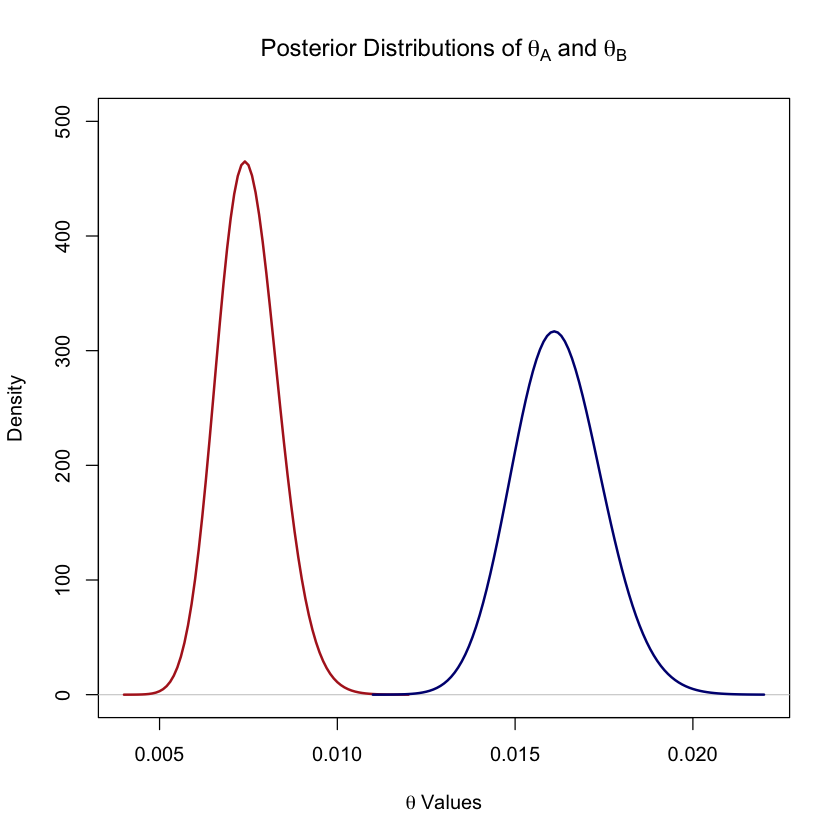

In [92]:
plot(x = 0, y = 0, 
     main = expression("Posterior Distributions of"~theta[A]~"and"~theta[B]),
     ylab = "Density", ylim = c(0,500),
     xlab = expression(theta~"Values"), xlim = c(0.004, 0.022))
abline(h=0, col = "lightgrey")
lines(x = seq(0.004, 0.012, 0.0001),
      y = dbeta(x = seq(0.004, 0.012, 0.0001), shape1 = 75, shape2 = 9927),
      lwd = 2, col = "firebrick")
lines(x = seq(0.011, 0.022, 0.0001),
      y = dbeta(x = seq(0.011, 0.022, 0.0001), shape1 = 162, shape2 = 9840),
      lwd = 2, col = "navyblue")

We could summarize these posteriors more thoroughly with measures of location, HDIs, posterior proabilities, and even Bayes factors. But recall that our interest is in $\theta_A-\theta_B$, not $\theta_A$ and $\theta_B$ individually. So let's determine the posterior for $\theta_A-\theta_B$ and then study it more thoroughly.

Unfortunately, there isn't a convenient closed-form expression for the distribution of the difference of two $\text{BETA}$ distributions. Actually, there *is* a closed form expression, but it's really gross. You can read about it in [this paper](https://www.tandfonline.com/doi/abs/10.1080/03610929308831114). So instead, we're going to simulate this distribution.

We know that $\theta_A|Y \sim \text{BETA}(\alpha_A, \beta_A)$ and $\theta_B|Y \sim \text{BETA}(\alpha_B, \beta_B)$. If we take many random draws from these distributions and then take their pairwise differences, the result will approximate the distribution of $\theta_A-\theta_B|Y$. Let's try it below.

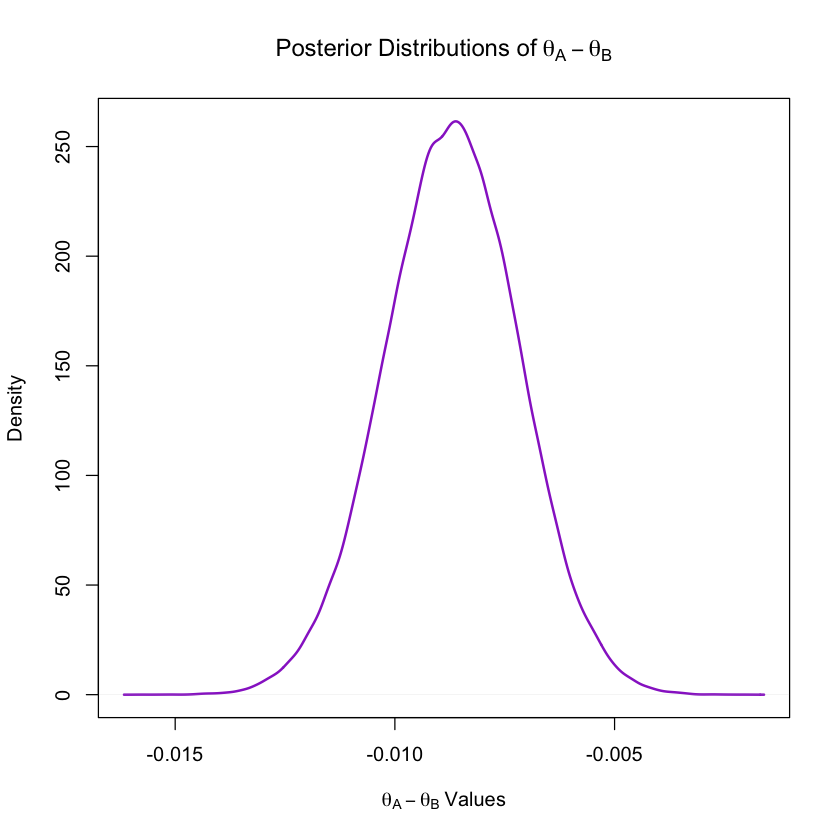

In [93]:
thetaA = rbeta(n = 100000, shape1 = 75, shape2 = 9927)  
thetaB = rbeta(n = 100000, shape1 = 162, shape2 = 9840)  
plot(density(thetaA - thetaB), main = expression("Posterior Distributions of"~theta[A]-theta[B]),
     ylab = "Density", xlab = expression(theta[A]-theta[B]~"Values"), lwd = 2, col = "darkorchid")

The posterior above (and summaries of it) provide rich information about the plausible values for $\theta_A-\theta_B$. Next we define a function in `R` that provides many useful summaries of posterior distributions. We'll first define the function, then describe the summaries it carries out, and then illustrate its use in several scenarios.

In [94]:
install.packages("HDInterval", repos='http://cran.us.r-project.org')
library(HDInterval)

summarize_posterior = function(x, delta = NULL, cl = 0.9, 
                               main = "", xlab = "", ylab = "Density",
                               xlim = NULL, ylim = NULL, col = "firebrick",
                               loc1 = "topleft", loc2 = "topright"){
  den = density(x)
  plot(den, lwd = 2, col = col, main = main, xlab = xlab, ylab = ylab, xlim = xlim, ylim = ylim)
  polygon(den, col = adjustcolor(col, 0.25))
  if(!is.null(delta)){
    delta1 = delta[1]
    delta2 = delta[2]
    if(delta1 == -Inf){
      delta1x = which.min(den$x)
    }else{
      delta1x = which.min(abs(delta1 - den$x))
    }
    if(delta2 == Inf){
      delta2x = which.max(den$x)
    }else{
      delta2x = which.min(abs(delta2 - den$x))
    }
    segments(x0 = delta1, y0 = 0, x1 = delta1, y1 = den$y[delta1x], col = col, lwd = 2)
    segments(x0 = delta2, y0 = 0, x1 = delta2, y1 = den$y[delta2x], col = col, lwd = 2)
    polygon(x = c(delta1, den$x[delta1x:delta2x], delta2), y = c(0,den$y[delta1x:delta2x], 0), 
            col = adjustcolor(col, 0.5))
    cpm = mean(x >= delta1 & x <= delta2)
  }
  HDI = as.numeric(hdi(x, cl)[1:2])
  segments(x0 = HDI[1], y0 = max(den$y)*0.05, x1 = HDI[2], y1 =  max(den$y)*0.05, lwd = 3)
  text(x = mean(HDI), y = max(den$y)*0.05, pos=3,
       labels = paste0(100*cl,"% HDI: (", round(HDI[1],4), ", ", round(HDI[2],4), ")"))
  legend(loc1, bty = "n", legend=c(paste0("Posterior Mean = ", round(mean(x),4)),
                                        paste0("Posterior Mode = ", round(den$x[which.max(den$y)],4)),
                                        paste0("Posterior Median = ", round(median(x),4))))
  if(!is.null(delta)){
      if(delta1 == -Inf & delta2 != Inf){
          legend(loc2, legend = bquote("Pr("*-infinity~"<"~theta[A]-theta[B]~"<"~.(delta2)*"|Y)="~.(round(cpm,4))), 
           bty = "n", text.col = col)
      }else if(delta1 != -Inf & delta2 == Inf){
          legend(loc2, legend = bquote("Pr("*.(delta1)~"<"~theta[A]-theta[B]~"<"~infinity*"|Y)="~.(round(cpm,4))), 
           bty = "n", text.col = col)
      }else if(delta1 == -Inf & delta2 == Inf){
          legend(loc2, legend = bquote("Pr("*-infinity~"<"~theta[A]-theta[B]~"<"~infinity*"|Y)="~.(round(cpm,4))), 
           bty = "n", text.col = col)
      }else{
          legend(loc2, legend = bquote("Pr("*.(delta1)~"<"~theta[A]-theta[B]~"<"~.(delta2)*"|Y)="~.(round(cpm,4))), 
           bty = "n", text.col = col)
      }
  }
}


The downloaded binary packages are in
	/var/folders/mg/psbkd77d5ss4rrh1nr53xjlc0000gp/T//RtmpkZ3hxT/downloaded_packages


### Posterior Summaries: Measures of Location

With the posterior $p(\theta|y)$ determined, we may perform inference for $\theta$ by summarizing this distribution. One method of inferring plausible values for $\theta$ is to calculate measures of location in the posterior distribution. For instance, the *posterior mean*: $$\mathbb{E}[\theta|y]=\int_\theta \theta p(\theta|y)d\theta.$$

Or the *posterior mode*: $$\operatorname*{argmax}_{\theta}p(\theta|y).$$

Or a *posterior quantile*: $$P^{-1}_{\theta|y}(q)$$ such as the median (i.e., when $q=0.5).$

#### Example: Ryan Reynolds A/B Test

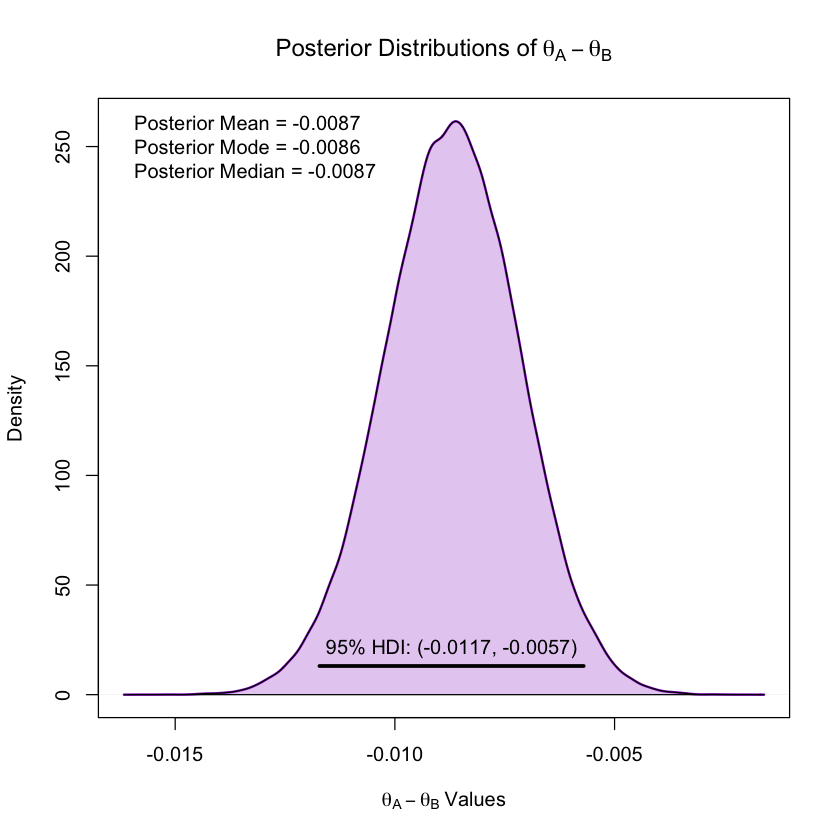

In [95]:
summarize_posterior(x = thetaA-thetaB, delta = NULL, cl = 0.95, col = "darkorchid", 
                    main = expression("Posterior Distributions of"~theta[A]-theta[B]), 
                    xlab = expression(theta[A]-theta[B]~"Values"))

What have we learned?

* The posterior is concentrated around $-0.0087$, as all measures of center are near this value. This suggests, in some sense, that the most tyical value of $\theta_A-\theta_B$ is -0.0087.
* There is something called an HDI, and it appears to be the interval $(-0.0117, -0.0057)$. Let's focus on this next.

### Posterior Summaries: Credible Intervals

In Bayesian inference, a posterior *credible interval* $(L,U)$ with *credible level* $c\in(0,1)$ is an interval that contains $100c\%$ of the posterior distribution. Stated another way, it is an interval that contains $\theta$ with probability $c$: $$\mathbb{P}(L<\theta<U|Y) = \int_L^Up(\theta|y)d\theta = c.$$

Such intervals are typically regarded as Bayesian confidence intervals. However, their interpretation is much more straightforward than frequentist confidence intervals. For instance, suppose $(L,U)$ is a 95% credible interval. Then, the probability $\theta$ lies between $L$ and $U$ is 0.95.

Note that for a given credible level $c$, there isn't one unique credible interval; there are infinitely many. Two common choices are:

* The *central* credible interval, where $L$ and $U$ are taken to be the $c/2$ and $1-c/2$ quantiles of the posterior distribution.

* The *highest density* credible interval (abbreviated HDI), defined as the *shortest* interval with coverage $c$. In other words, it's the interval with highest density.

When the posterior is unimodal and symmetric, these two intervals are the same. However, we shall use the HDI in this course due to the nice property of it being the narrowest interval with desired coverage. In the Ryan Reynolds example above, we saw that the HDI for $\theta_A - \theta_B$ was $(-0.0117, -0.0057)$. So although we can't say exactly what $\theta_A-\theta_B$ is, we are 95\% sure that it lies between $-0.0117$ and $-0.0057$.

### Posterior Summaries: Posterior Probabilities

As we saw above, the credible interval is closely related to posterior probabilties. Sometimes interest lies in going the other direction: rather than finding an interval with specific coverage $c$, we may instead be interested in determining the posterior probability that $\theta$ lies in some specific, meaningful interval of our choosing. 

A posterior probability can be defined most generally as $$\mathbb{P}(\delta_1<\theta<\delta_2|Y)$$ where the endpoints of the interval $(\delta_1,\delta_2)$ are chosen based on the context of the problem to provide a meaningful comparison.

In the context of an A/B test, where we're comparing $\theta_A$ and $\theta_B$, the posterior probability of interest may be a *comparative probability metric*: $$CPM = \mathbb{P}(\delta_1<\theta_A-\theta_B<\delta_2|Y).$$ 

Assuming bigger is better, common choices of $(\delta_1,\delta_2)$ in this setting include:

* $(0, \infty)$: giving rise to the probability that $\theta_A$ is *superior* to $\theta_B$
* $(-\infty, 0)$: giving rise to the probability that $\theta_A$ is *inferior* to $\theta_B$
* $(-\delta,\delta)$: giving rise to the *probability of agreement* (when $\delta$ is taken to be the smallest difference of practical importance)
* $(-\delta, \infty)$: giving rise to the probability that $\theta_A$ is *practically superior* to $\theta_B$
* $(-\infty, \delta)$: giving rise to the probability that $\theta_B$ is *practically inferior* to $\theta_B$

Supposing we regard the statement $\delta_1<\theta_A-\theta_B<\delta_2$ as a null hypothesis of sorts. Posterior probabilities defined in this way quantify the probability that $H_0$ is true. This is an incredibly intuitive interpretation! Indeed it is what many people mistakenly think (or wish) the p-value corresponds to.

#### Example: Ryan Reynolds A/B Test

Let's next calculate some posterior probabilities that may be of interest in this setting. First, let's calculate the probability that the "With Ryan" ad (Test A) is strictly *worse* than the "Without Ryan" ad (Test B). This corresponds to the inferiority probability $$\mathbb{P}(-\infty < \theta_A - \theta_B<0|Y) = \mathbb{P}(\theta_A < \theta_B|Y).$$

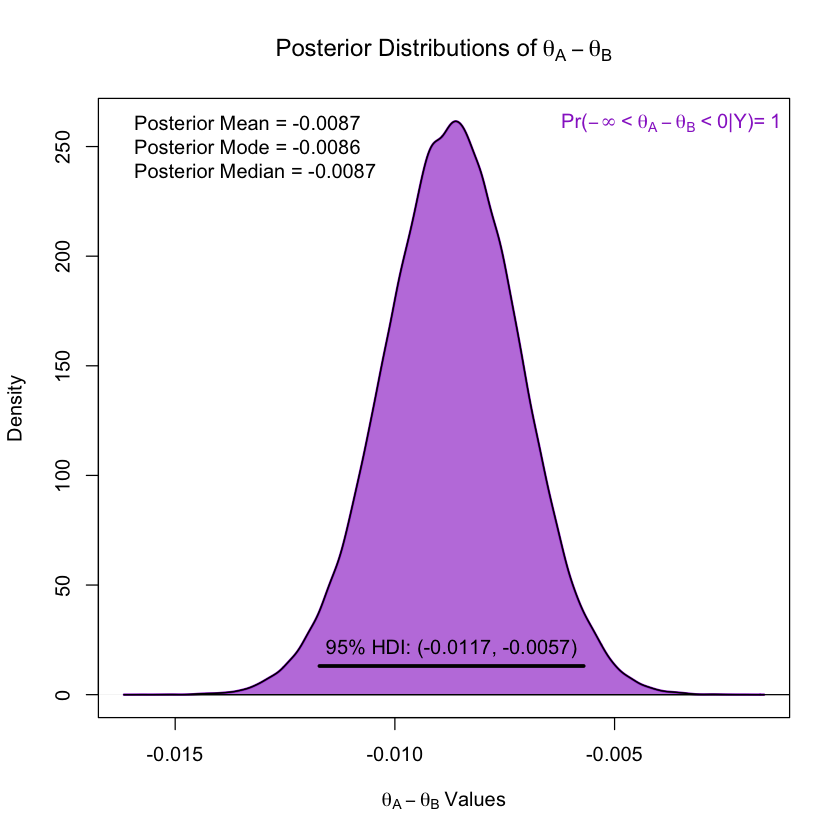

In [96]:
summarize_posterior(x = thetaA-thetaB, delta = c(-Inf, 0), cl = 0.95, col = "darkorchid", 
                    main = expression("Posterior Distributions of"~theta[A]-theta[B]), 
                    xlab = expression(theta[A]-theta[B]~"Values"))

As we can see, $\mathbb{P}(\theta_A < \theta_B|Y)$ is estimated to be 1, indicating that we are *certain* that the "With Ryan" ad (Test A) is worse than the "Without Ryan" ad (Test B).

As an unrealistic hypothetical, let's suppose that the "Without Ryan" ad (Test B) is more expensive to make and operate than the "With Ryan" ad (Test A). Further, let's assume that to make the change from the A ad to the B ad worthwhile, we require $\theta_B-\theta_A\geq0.01$. Using a carefully specified posterior probability, we can easily calculate the likelihood that $\theta_B-\theta_A\geq0.01$ or, equivalently, that $\theta_A-\theta_B\leq-0.01$. This corresponds to the probability $$\mathbb{P}(\theta_A - \theta_B\leq-0.01|Y).$$

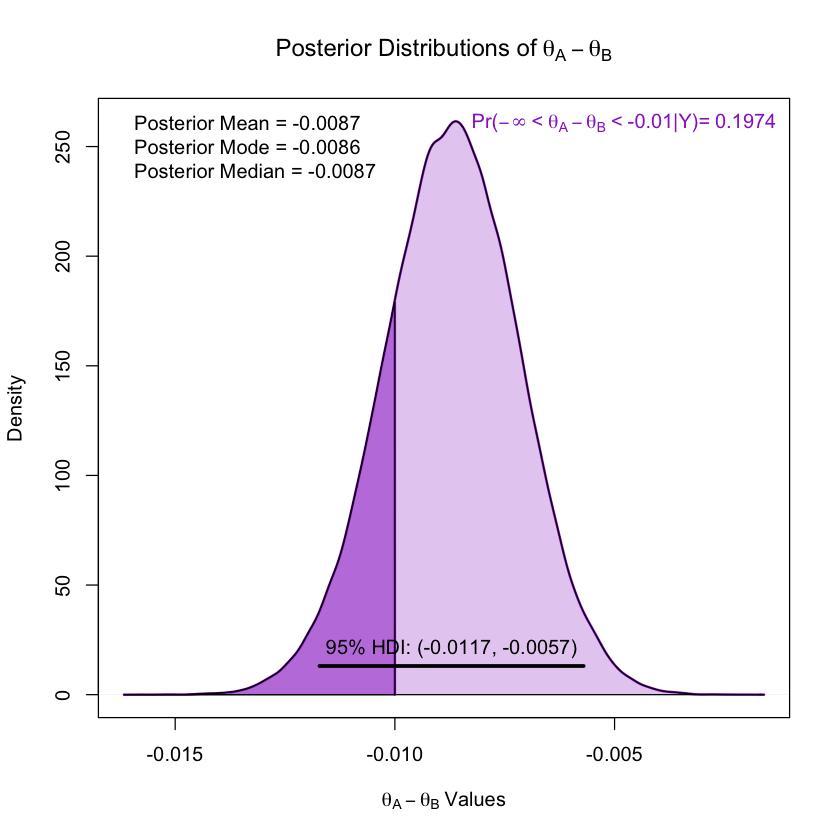

In [97]:
summarize_posterior(x = thetaA-thetaB, delta = c(-Inf, -0.01), cl = 0.95, col = "darkorchid", 
                    main = expression("Posterior Distributions of"~theta[A]-theta[B]), 
                    xlab = expression(theta[A]-theta[B]~"Values"))

As we can see, $\mathbb{P}(\theta_A - \theta_B\leq-0.01|Y)$ is estimated to be 0.1974. So if this was our circumstance, we would not be very confident that the "Without Ryan" ad (Test B) is *sufficiently* better than the "With Ryan" ad (Test A). We may then choose to retain the "With Ryan" ad.

### Posterior Summaries: Bayes Factors

When people think of "Bayesian hypothesis testing", they tend to think of Bayes factors. With this analysis, interest still lies in using observed data to compare a null hypothesis $H_0$ to an alternative hypothesis $H_1$ and determined which seems more plausible. The Bayes factor $K$ compares the posterior odds that $H_0$ is true to the prior odds that $H_0$ is true by way of an odds ratio: $$K = \frac{\mathbb{P}(H_0|y)}{\mathbb{P}(H_1|y)}\div \frac{\mathbb{P}(H_0)}{\mathbb{P}(H_1)}.$$

The following table provides a categorization of Bayes factor values that aids in their interpretation.

| Values of K  | Strength of Evidence in Favor of H<sub>0</sub>                    |
|:-------------:|:-----------------------------------:|
| K<10<sup>0</sup>       | Negative (supports H<sub>1</sub>)|
| 10<sup>0</sup><K<10<sup>1/2</sup>  | Barely worth mentioning         |
| 10<sup>1/2</sup><K<10<sup>1</sup>  | Substantial             |
| 10<sup>1</sup><K<10<sup>3/2</sup> | Strong       |
| 10<sup>3/2</sup><K<10<sup>2</sup>      | Very Strong  |
| K>10<sup>2</sup>      | Decisive  |

#### Example: Ryan Reynolds A/B Test

Let us suppose we are interested in the hypothesis of superiority/inferiority: $$H_0:\theta_A\leq\theta_B \text{ vs. } H_1: \theta_A>\theta_B$$

and suppose a priori we have no idea which of these hypotheses is more likely, so we make the assumption $\mathbb{P}(H_0)=\mathbb{P}(H_1)=0.5$. In this case, the Bayes factor reduces to the ratio of posterior probabilities: $$K = \frac{\mathbb{P}(H_0|y)}{\mathbb{P}(H_1|y)} = \frac{\mathbb{P}(\theta_A \leq \theta_B|Y)}{\mathbb{P}(\theta_A > \theta_B|Y)}.$$

The numerator and denominator probabilities were determined in the previous section: $\mathbb{P}(\theta_A \leq \theta_B|Y)=1$ and hence $\mathbb{P}(\theta_A > \theta_B|Y)=0$. Thus we have $K=\infty$ and hence decisive evidence in favor of $H_0$ (i.e., that the Without Ryan ad is superior to the With Ryan ad).

Note that when we assume $\mathbb{P}(H_0)=\mathbb{P}(H_A)$ as we did above, the Bayes factor provides equivalent information as simply looking at either of the posterior probabilities individually. However, if we *do* have prior information about the likelihood of these hypotheses, this can be incorporated as we will next illustrate.

In the A/B testing setting, it's estimated that as few as 30\% of ideas lead to improvement. Translating that to this context, before collecting data, we would only be 30\% sure that the Without Ryan ad (Test B) is better than the With Ryan ad (Test a). In other words, we believe a priori that $\mathbb{P}(H_0)=0.3$ and $\mathbb{P}(H_1) = 0.7$. Let's see what this does to our Bayes factor calculation: $$K = \frac{\mathbb{P}(H_0|y)}{\mathbb{P}(H_1|y)}\div \frac{\mathbb{P}(H_0)}{\mathbb{P}(H_1)}=\frac{1}{0}\div\frac{0.3}{0.7} = \infty.$$ 

Again, we find we have decisive evidence in favor of $H_0$.

### ASIDE: Beyond Posteriors for $\theta_A-\theta_B$

These analyses assumed that $\theta_A-\theta_B$ was the quantity of interest. This implicitly assumes that differences on the additive scale are of relevance. However, especially when comparing probabilities, interest may lie in relative (or percent) differences in which case $\theta_A/\theta_B$ may be the quantity of interest. It turns out that this simulation method makes it trivial to study the posterior distribition of $$\frac{\theta_A}{\theta_B} \big| Y$$ or even $$\frac{\theta_B}{\theta_A}\big|Y.$$ We simply take ratios of the draws from $\theta_A|Y$ and $\theta_B|Y$ instead of pairwise differences. Below we visualize the distribution of $\frac{\theta_A}{\theta_B}\big|Y$

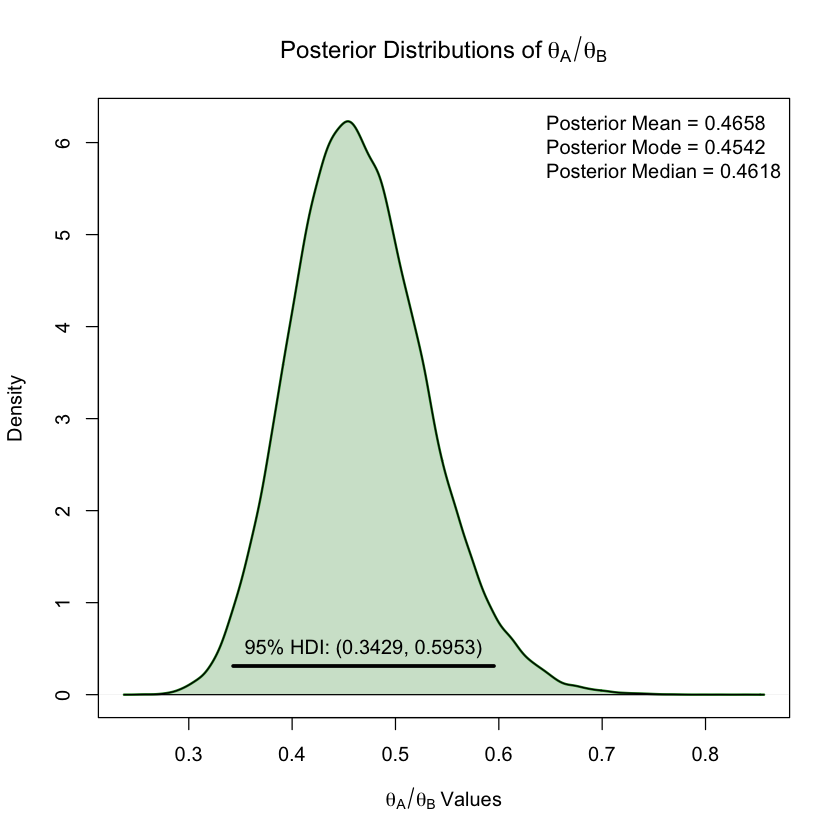

In [98]:
summarize_posterior(x = thetaA/thetaB, delta = NULL, cl = 0.95, col = "forestgreen", 
                    main = expression("Posterior Distributions of"~theta[A]/theta[B]), 
                    xlab = expression(theta[A]/theta[B]~"Values"), loc1 = "topright")

And here we visualize the distribution of $\frac{\theta_B}{\theta_A}|Y$

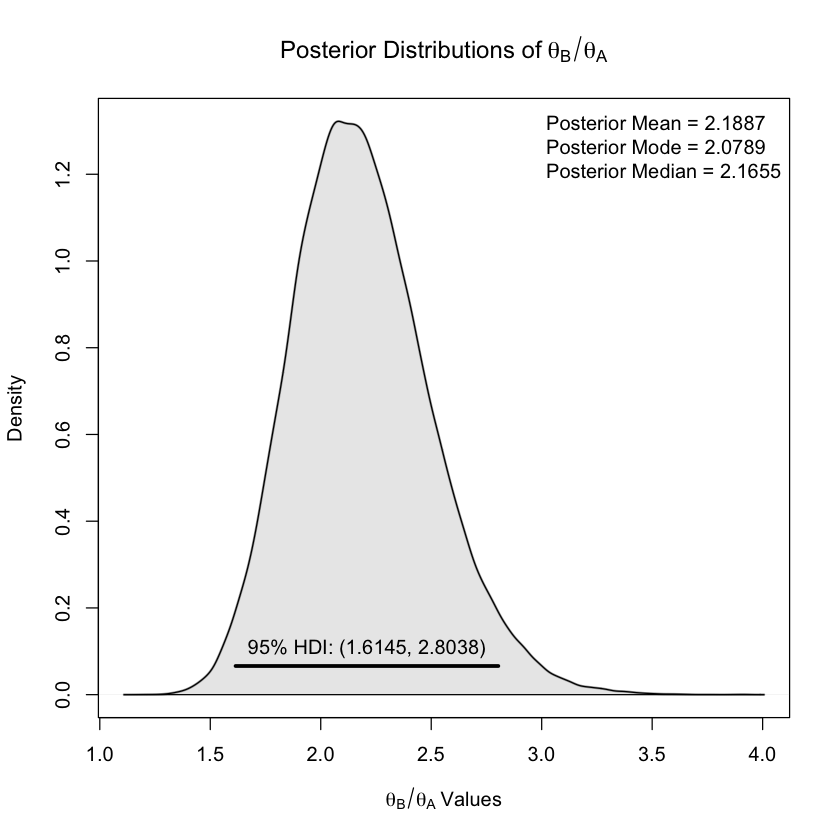

In [99]:
summarize_posterior(x = thetaB/thetaA, delta = NULL, cl = 0.95, col = "darkgrey", 
                    main = expression("Posterior Distributions of"~theta[B]/theta[A]), 
                    xlab = expression(theta[B]/theta[A]~"Values"), loc1 = "topright")

The posteriors above may be used to more thoroughly study how similar or different $\theta_A$ and $\theta_B$ are on the percent scale. Likewise, posterior distributions for odds ratios or other functions of $\theta_A$ and $\theta_B$ are easily determined.

### ASIDE: MCMC Simulation

Although we will not go into the details of MCMC simulation here, we *will* use it. It suffices to mention in passing that MCMC methods provide a sophisticated means of simulating draws $\theta^1, \theta^2, \theta^3,\ldots$ from any arbitrary posterior distribution $p(\theta|y)$, hence allowing us to estimate it. We will implement MCMC simulation, specifically for the A/B test-type comparisons described above, using the `bayesTest()` function from the `bayesAB` package.

In [100]:
install.packages('bayesAB', repos='http://cran.us.r-project.org')
library(bayesAB)


The downloaded binary packages are in
	/var/folders/mg/psbkd77d5ss4rrh1nr53xjlc0000gp/T//RtmpkZ3hxT/downloaded_packages


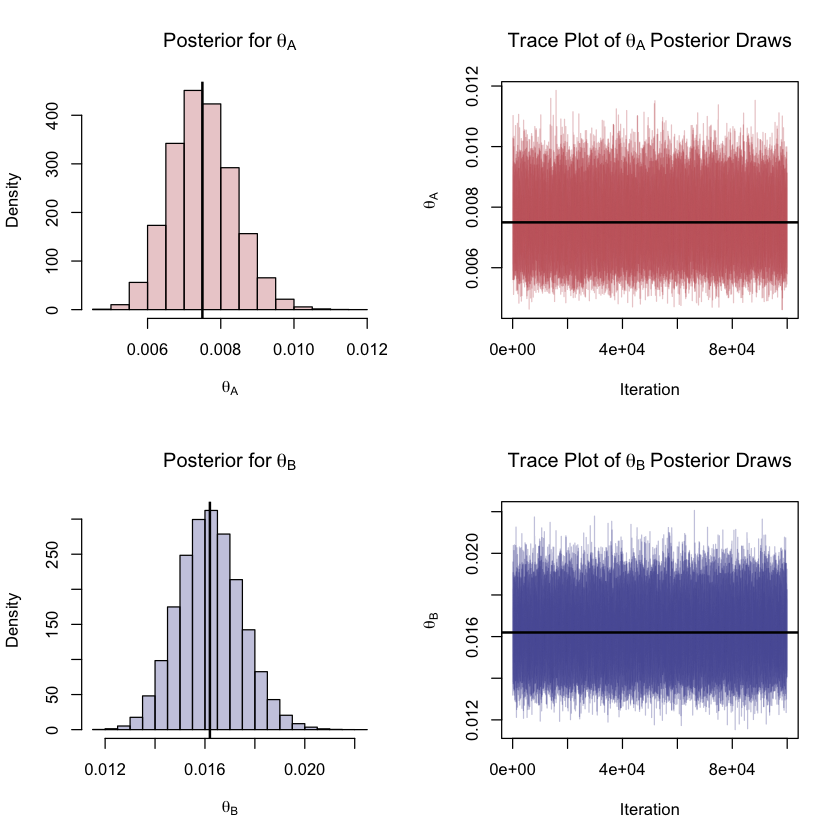

In [103]:
res = bayesTest(yA, yB, distribution = 'bernoulli',
                 priors = c('alpha' = 1, 'beta' = 1))
thetaA = res$posteriors$Probability$A
thetaB = res$posteriors$Probability$B

par(mfrow=c(2,2))
hist(thetaA, main = expression("Posterior for"~theta[A]), probability = TRUE, 
     xlab = expression(theta[A]), col = adjustcolor("firebrick", 0.25))
abline(v = mean(thetaA), lwd = 2)
ts.plot(thetaA, main = expression("Trace Plot of"~theta[A]~"Posterior Draws"), 
        xlab = "Iteration", ylab = expression(theta[A]), col = adjustcolor("firebrick", 0.25))
abline(h = mean(thetaA), lwd = 2)
hist(thetaB, main = expression("Posterior for"~theta[B]), probability = TRUE, 
     xlab = expression(theta[B]), col = adjustcolor("navyblue", 0.25))
abline(v = mean(thetaB), lwd = 2)
ts.plot(thetaB, main = expression("Trace Plot of"~theta[B]~"Posterior Draws"), 
        xlab = "Iteration", ylab = expression(theta[B]), col = adjustcolor("navyblue", 0.25))
abline(h = mean(thetaB), lwd = 2)

The plots above visualize the MCMC draws for each posterior $p(\theta_A|y)$ and $p(\theta_B|y)$. They serve as diagnostics to check whether the Markov chains converged properly. 

Let's next use our `summarize_posterior()` function to explore the posteriors for $\theta_A$, $\theta_B$, and $\theta_A-\theta_B$ more closely. These *should* look like the ones we've previously dealt with that were based on analytical forms.

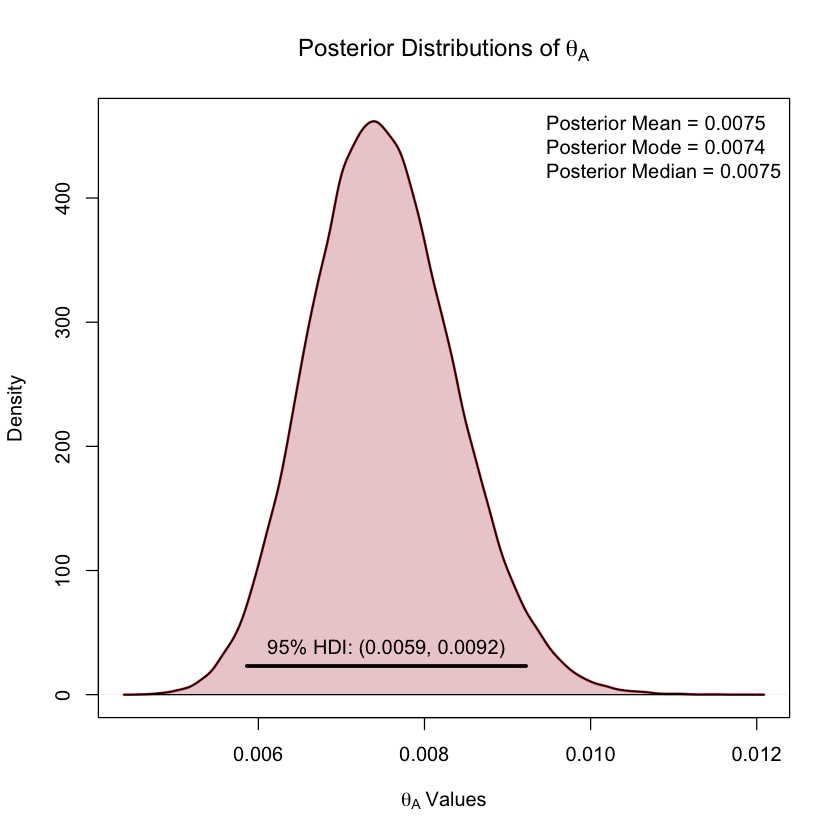

In [104]:
summarize_posterior(x = thetaA, delta = NULL, cl = 0.95, col = "firebrick", 
                    main = expression("Posterior Distributions of"~theta[A]), 
                    xlab = expression(theta[A]~"Values"), loc1 = "topright")

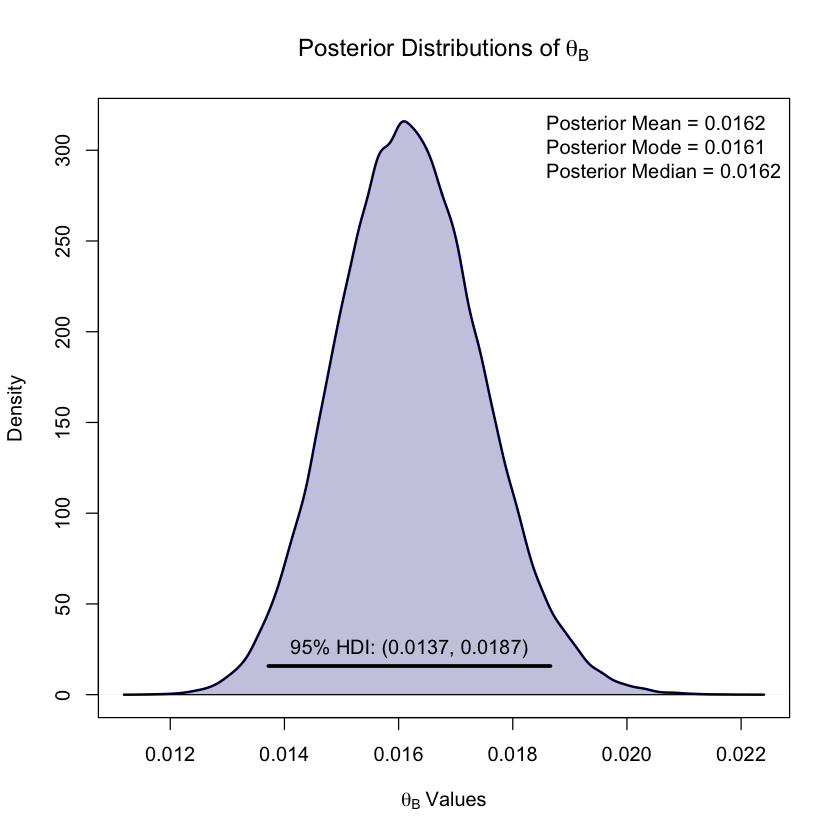

In [105]:
summarize_posterior(x = thetaB, delta = NULL, cl = 0.95, col = "navyblue", 
                    main = expression("Posterior Distributions of"~theta[B]), 
                    xlab = expression(theta[B]~"Values"), loc1 = "topright")

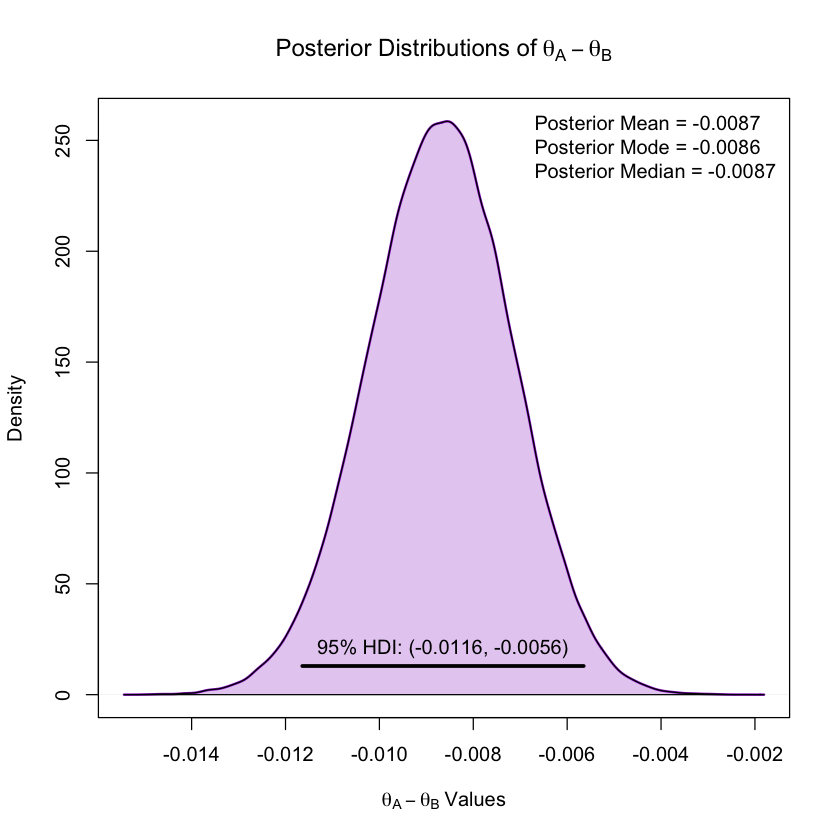

In [106]:
summarize_posterior(x = thetaA-thetaB, delta = NULL, cl = 0.95, col = "darkorchid", 
                    main = expression("Posterior Distributions of"~theta[A]-theta[B]), 
                    xlab = expression(theta[A]-theta[B]~"Values"), loc1 = "topright")

### ASIDE: Informative Priors

Until now we have assumed uninformative $\text{BETA}(1,1)$ priors for $\theta_A$ and $\theta_B$. Let's select new $\alpha$ and $\beta$ values to incorporate some historical knowledge into our prior specifications. 

Suppose we're pretty sure, from past experience, that the conversion rates are most likely to be in the neighbourhood of 1\%-5\%. What values of $\alpha$ and $\beta$ should we choose that would be consistent with this prior information? Let's again use the [Beta Distribution Visualizer](https://nathaniel-t-stevens.shinyapps.io/Beta_Distribution_Visualizer/) to aid in this decision.

Let's take $\alpha = 1.2$ and $\beta = 10$. This gives rise to the following prior distribution for $\theta_A$ and $\theta_B$.

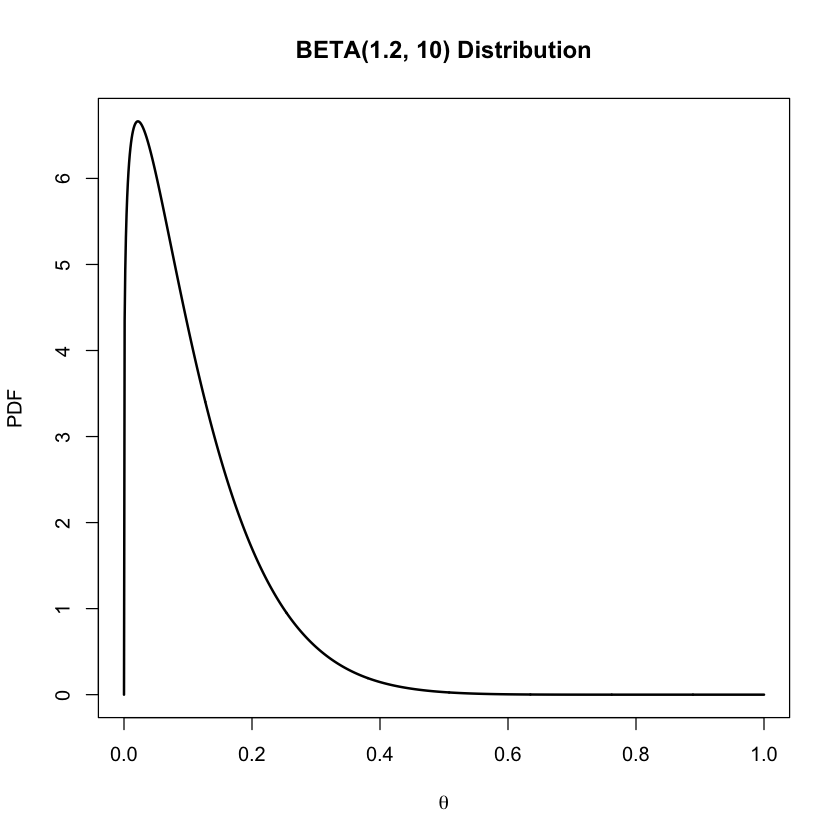

In [107]:
plot(x = seq(0, 1, 0.001), y = dbeta(x = seq(0, 1, 0.001), shape1 = 1.2, shape2 = 10), 
     type = "l", lwd = 2, main = "BETA(1.2, 10) Distribution", ylab = "PDF", 
     xlab = expression(theta))

With our new friend `bayesTest()` we can easily determine (via MCMC simulation) the posteriors for $\theta_A$,  $\theta_B$, and hence $\theta_A-\theta_B$ for different specifications of the priors.

In [108]:
res = bayesTest(yA, yB, distribution = 'bernoulli',
                 priors = c('alpha' = 1.2, 'beta' = 10))
thetaA = res$posteriors$Probability$A
thetaB = res$posteriors$Probability$B

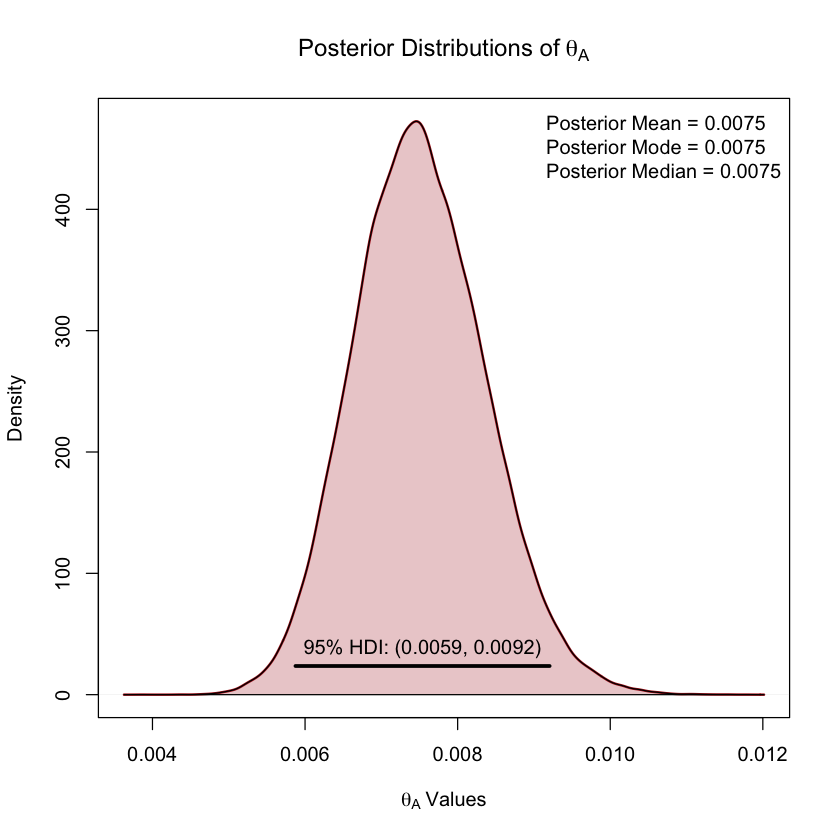

In [109]:
summarize_posterior(x = thetaA, delta = NULL, cl = 0.95, col = "firebrick", 
                    main = expression("Posterior Distributions of"~theta[A]), 
                    xlab = expression(theta[A]~"Values"), loc1 = "topright")

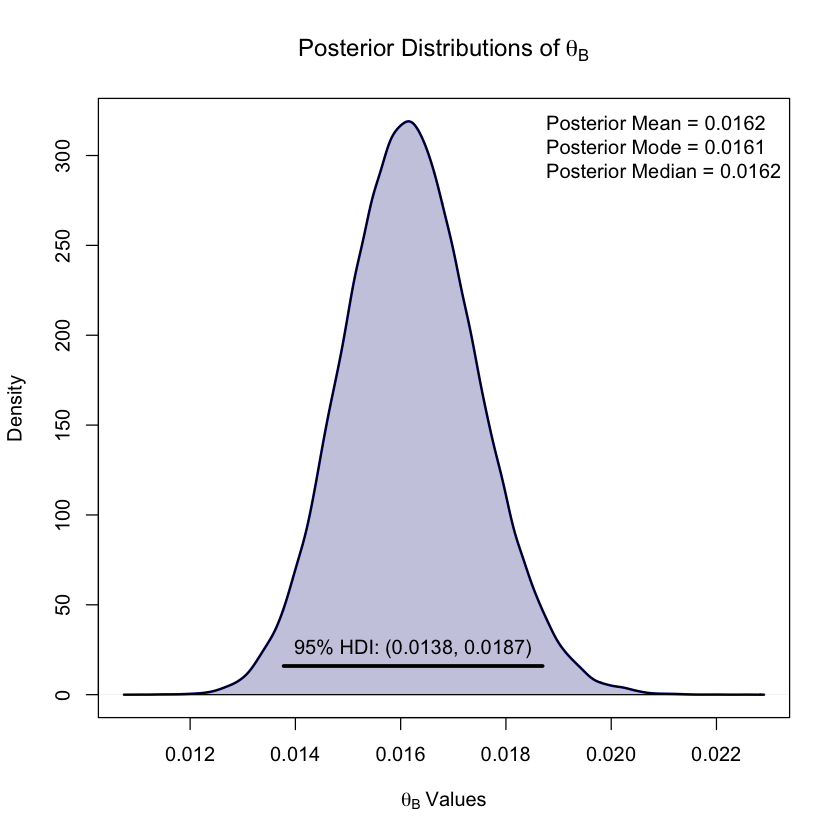

In [110]:
summarize_posterior(x = thetaB, delta = NULL, cl = 0.95, col = "navyblue", 
                    main = expression("Posterior Distributions of"~theta[B]), 
                    xlab = expression(theta[B]~"Values"), loc1 = "topright")

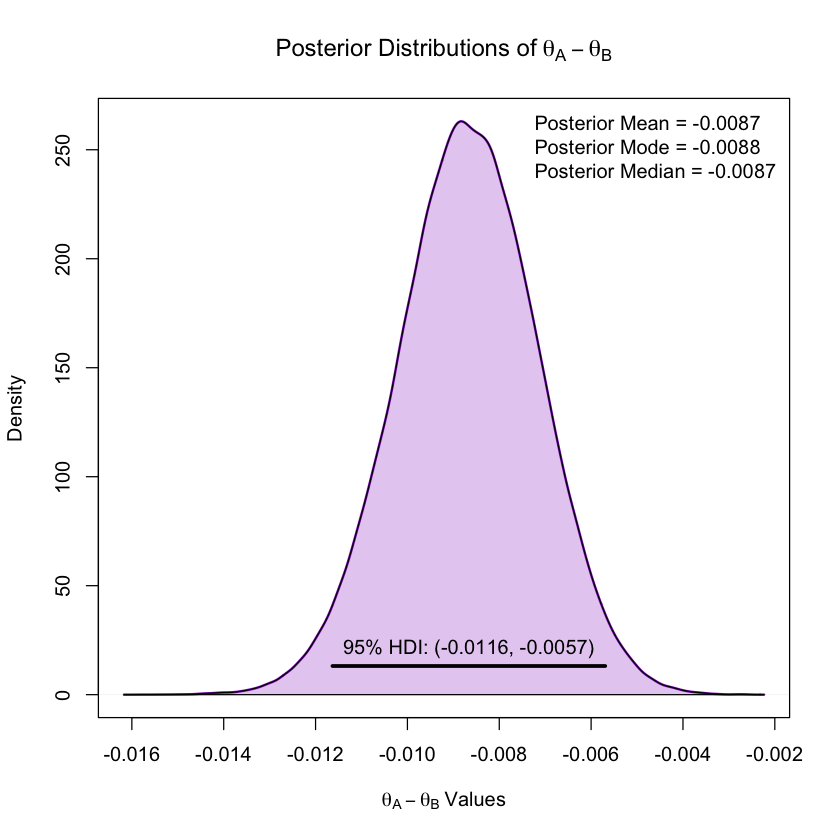

In [111]:
summarize_posterior(x = thetaA-thetaB, delta = NULL, cl = 0.95, col = "darkorchid", 
                    main = expression("Posterior Distributions of"~theta[A]-theta[B]), 
                    xlab = expression(theta[A]-theta[B]~"Values"), loc1 = "topright")

These posterior distributions look remarkably similar to those corresponding to the uninformative $\text{BETA}(1,1)$ priors. This suggests that our conclusions are robust to different prior specifications. But don't be fooled, this won't *always* be true! In fact, it's the exception to the rule. Why might this be happening here? 


## EXERCISE: Optimizely Homepage Redesign
During a website redesign, Optimizely was interested in how new versions of certain pages influenced
things like conversion and engagement relative to the old version. One outcome they were interested in was whether or not the redesigned homepage lead to a significant increase in the number of new accounts created ([you can read about it in this book](https://www.wiley.com/en-us/A+B+Testing%3A+The+Most+Powerful+Way+to+Turn+Clicks+Into+Customers-p-9781118659205)). In this experiment they developed two versions of the homepage:

* A: Original Homepage
* B: Redesigned Homepage

![optimizely_AB_test](optimizely.png)

The metric they were interested in was conversion rate (i.e., the probability $\theta$ that a visitor would sign up). During the experiment, $n_A=8872$ visitors were shown the original homepage and $n_B=8642$ visitors were shown the redesigned homepage. In *original* version $280$ visitors signed up while in the *redesigned* version $399$ visitors signed up. This corresponds to observed conversion rates of $\hat{\theta}_A = 0.0316$ and $\hat{\theta}_B = 0.0462$.

Analyze the data from this experiment with both frequentist and Bayesian methods. What do you conclude?

## What About Non-Binary Data?

### Comparing Means of Continuous Distributions

What if our data was continuous instead of binary, and we wanted to compare means rather than probabilities? This is the kind of thing that a frequentist might do with a two-sample $t$-test. 

How would a Bayesian approach this problem? From a mechanical standpoint, exactly like we did with the binary data! We need only specify the data distribution, the prior distributions, and use MCMC to simulate draws from the relevant posterior distribution.

Below we will consider a hypothetical example with normal data. Using now familiar notation, the data distribution will follow $Y|\theta, \sigma^2 \sim \mathcal{N}(\theta, \sigma^2)$. In this case, the conjugate prior for $(\theta,\sigma^2)$ is the [normal-inverse-gamma distribution](https://en.wikipedia.org/wiki/Normal-inverse-gamma_distribution) with parameters $\mu$, $\lambda$, $\alpha$, and $\beta$.

Suppose an online retailer is experimenting with two versions of their checkout experience:

* A: current version
* B: new version

and interest lies in comparing average revenue per user. We generate some random data below and construct visualizations. The histograms depict the observed revenue distributions in each variant. The red curves overlayed are maximum likelihood-fitted normal density curves. Their agreement with the histograms indicate that the normal distribution well-characterizes this data. 

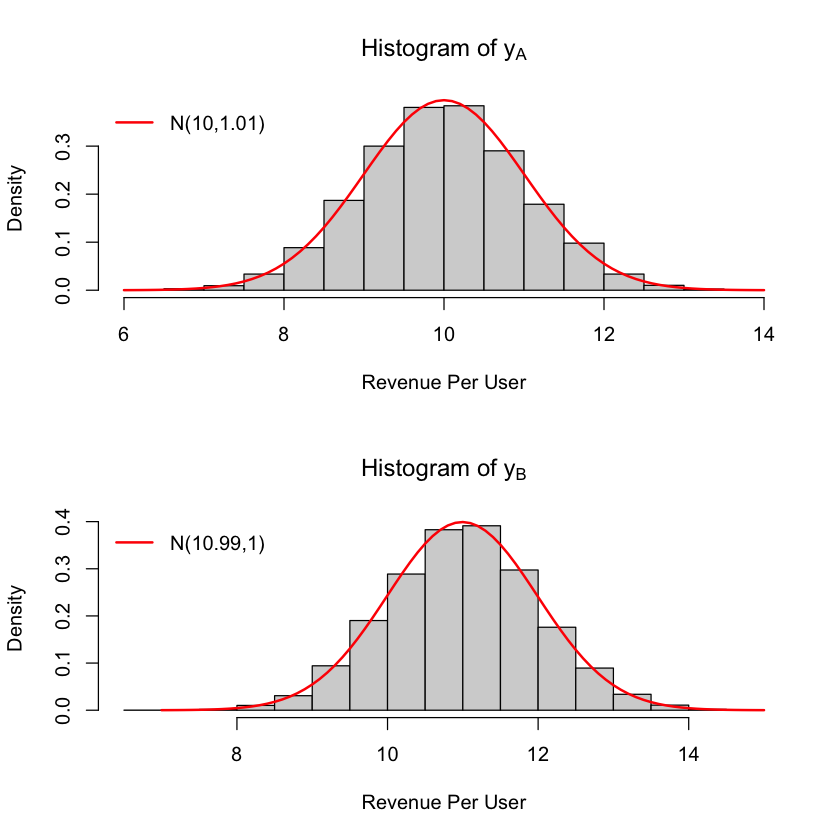

In [112]:
set.seed(3122023)
yA = rnorm(n = 10000, mean = 10, sd = 1)
yB = rnorm(n = 10000, mean = 11, sd = 1)
par(mfrow = c(2,1))
hist(yA, probability = TRUE, xlab = "Revenue Per User", 
     main = expression("Histogram of y"[A]), breaks = 20)
lines(x = seq(6, 14, 0.1), y = dnorm(x = seq(6, 14, 0.1), mean = mean(yA), sd = sd(yA)),
      col = "red", lwd = 2)
legend("topleft", lwd = 2, col = "red", bty = "n",
        legend = paste0("N(",round(mean(yA),2),",",round(sd(yA),2),")"))
hist(yB, probability = TRUE, xlab = "Revenue Per User", 
     main = expression("Histogram of y"[B]), breaks = 20)
lines(x = seq(7, 15, 0.1), y = dnorm(x = seq(7, 15, 0.1), mean = mean(yB), sd = sd(yB)),
      col = "red", lwd = 2)
legend("topleft", lwd = 2, col = "red", bty = "n",
        legend = paste0("N(",round(mean(yB),2),",",round(sd(yB),2),")"))

As we did in the last example, we're going to use MCMC simulation to approximate the relevant posterior distributions. Of interest to us here are $\theta_A$ and $\theta_B$, the expected revenue per user in each variant, and their difference $\theta_A-\theta_B$. We shall again use `bayesTest()` to generate posterior draws from $(\theta_A,\sigma_A^2)|Y$ and $(\theta_B,\sigma_B^2)|Y$. Histograms and trace plots for these posteriors are shown below.

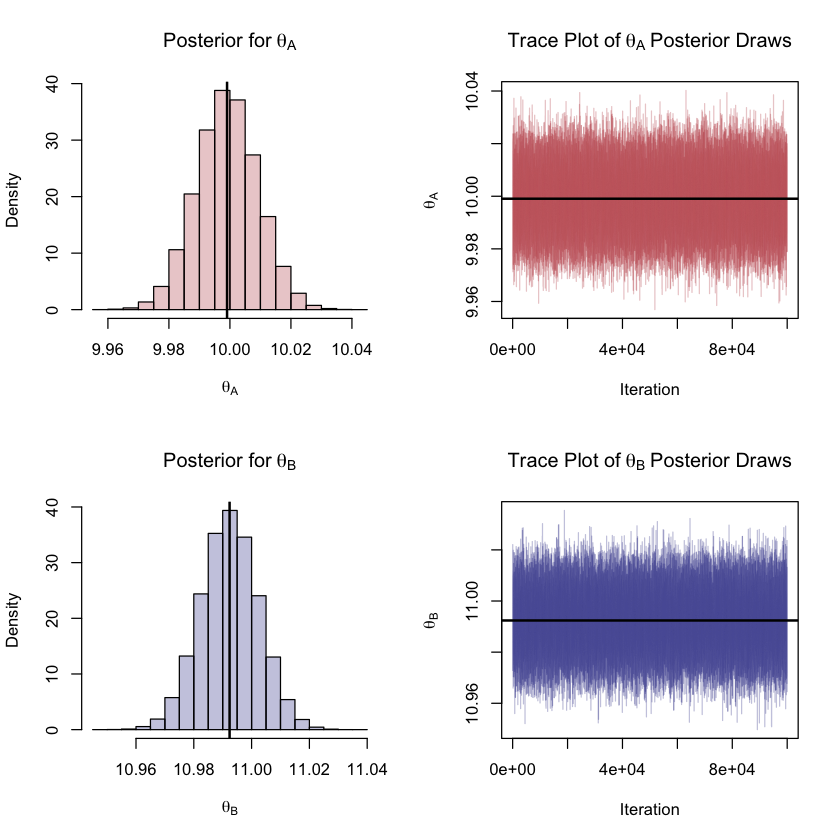

In [113]:
res = bayesTest(yA, yB, distribution = 'normal',
                priors = c('mu' = 5, 'lambda' = 1, 'alpha' = 3, 'beta' = 1))
thetaA = res$posteriors$Mu$A
thetaB = res$posteriors$Mu$B

par(mfrow=c(2,2))
hist(thetaA, main = expression("Posterior for"~theta[A]), probability = TRUE, 
     xlab = expression(theta[A]), col = adjustcolor("firebrick", 0.25))
abline(v = mean(thetaA), lwd = 2)
ts.plot(thetaA, main = expression("Trace Plot of"~theta[A]~"Posterior Draws"), 
        xlab = "Iteration", ylab = expression(theta[A]), col = adjustcolor("firebrick", 0.25))
abline(h = mean(thetaA), lwd = 2)
hist(thetaB, main = expression("Posterior for"~theta[B]), probability = TRUE, 
     xlab = expression(theta[B]), col = adjustcolor("navyblue", 0.25))
abline(v = mean(thetaB), lwd = 2)
ts.plot(thetaB, main = expression("Trace Plot of"~theta[B]~"Posterior Draws"), 
        xlab = "Iteration", ylab = expression(theta[B]), col = adjustcolor("navyblue", 0.25))
abline(h = mean(thetaB), lwd = 2)

We've used `summarize_posterior()` enough time times, and looked at enough posteriors now that below we include visual summaries of the relevant posteriors in this setting without commenting further. 

**Exercise:** Examine the plots below and think about what they tell you. What conclusions do you draw? Do they agree with a frequentist analysis? Do these summaries offer *additional* insight that a frequentist analysis does not?

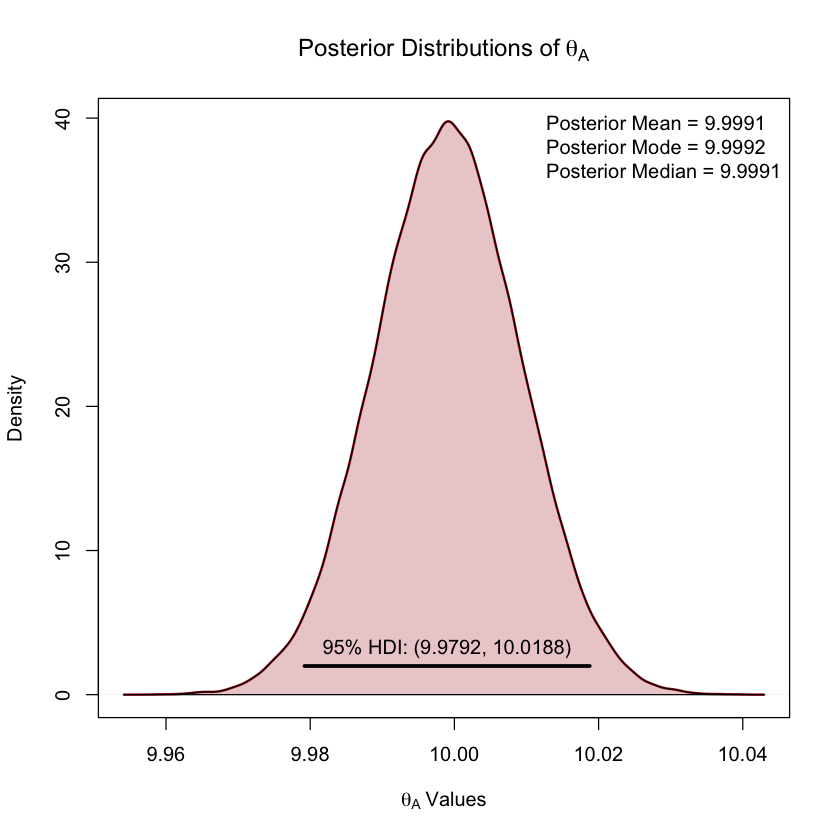

In [114]:
summarize_posterior(x = thetaA, delta = NULL, cl = 0.95, col = "firebrick", 
                    main = expression("Posterior Distributions of"~theta[A]), 
                    xlab = expression(theta[A]~"Values"), loc1 = "topright")

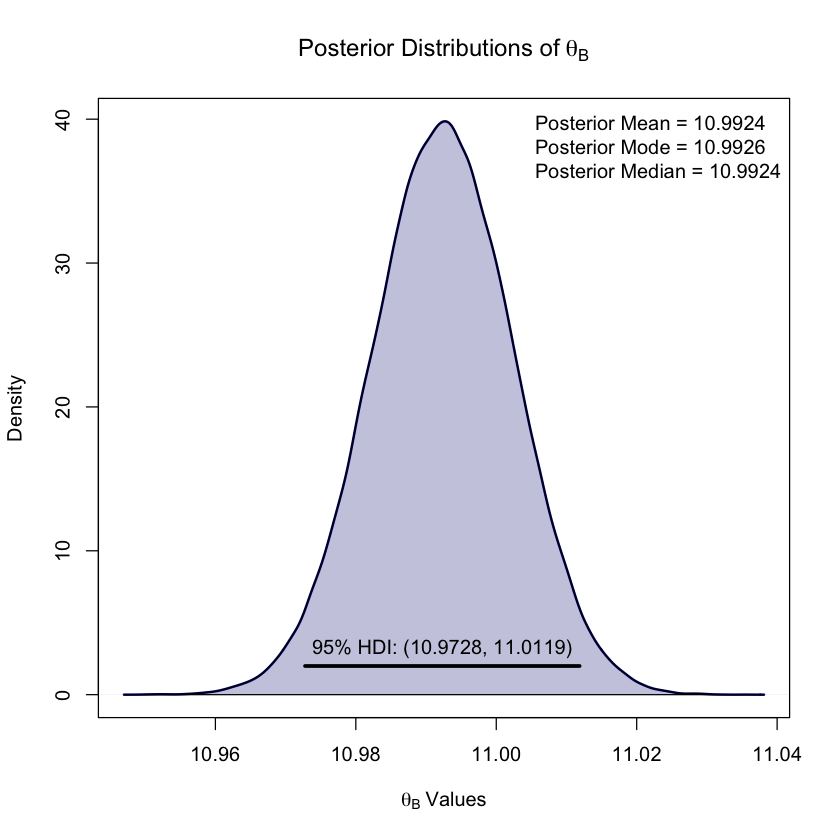

In [115]:
summarize_posterior(x = thetaB, delta = NULL, cl = 0.95, col = "navyblue", 
                    main = expression("Posterior Distributions of"~theta[B]), 
                    xlab = expression(theta[B]~"Values"), loc1 = "topright")

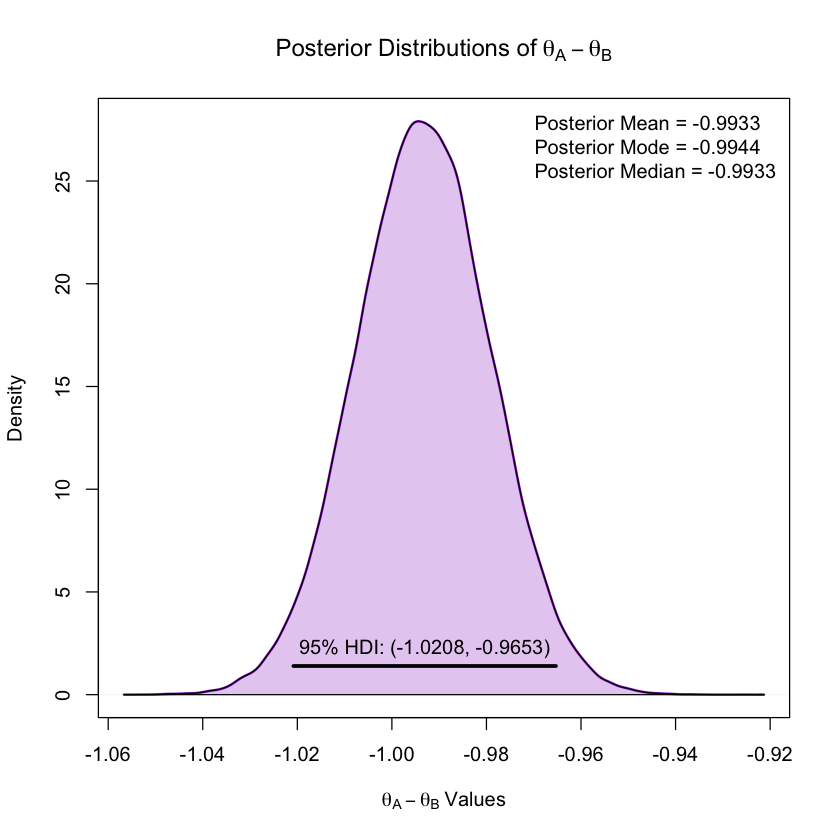

In [116]:
summarize_posterior(x = thetaA-thetaB, delta = NULL, cl = 0.95, col = "darkorchid", 
                    main = expression("Posterior Distributions of"~theta[A]-theta[B]), 
                    xlab = expression(theta[A]-theta[B]~"Values"), loc1 = "topright")

### Comparing Quantiles of Continuous Distributions

We'll again consider a scenario in which interest lies in a continuous response variable. But unlike in the previous section, let's assume that the data are skewed, in which case the normality assumption and any analyses that rely on it are invalid. As is often the case with skewed data, we will focus our attention on quantiles as measures of location.

To motivate such a scenario, we consider comparing page load times. [Researchers at LinkedIn](https://arxiv.org/pdf/1903.08762.pdf) described running online experiments where, among other things, interest lies in optimizing key performance indicators related to site speed and service latency, such as page load time. Page load time distributions tend to be right skewed and optimizing for average page load time is not as useful as optimizing tail performance; since the user experience associated with high page load times is negative, it is better to minimize worst case scenarios; minimizing typical page load times is not sufficient. As such, it is the industry standard to summarize and optimize page load time distributions with respect to their $90^\text{th}$ percentile. 

Here we consider a hypothetical experiment whose goal is to develop a new version of your webpage (B) that loads more quickly than the current version (A). The metric of interest here will be $\theta_A$ and $\theta_B$, the $90^\text{th}$ percentiles of the page load time distributions in each variant. We use the simulated data from the same example in [this paper](https://www.tandfonline.com/doi/full/10.1080/00031305.2021.2000495) and perform a Bayesian analysis. Although the context is rather different from the previous ones we've encountered, we'll find that the Bayesian analysis feels quite familiar. This is a testament to the flexibility and wide applicability of Bayesian methods.

We begin by visualizing the observed data.

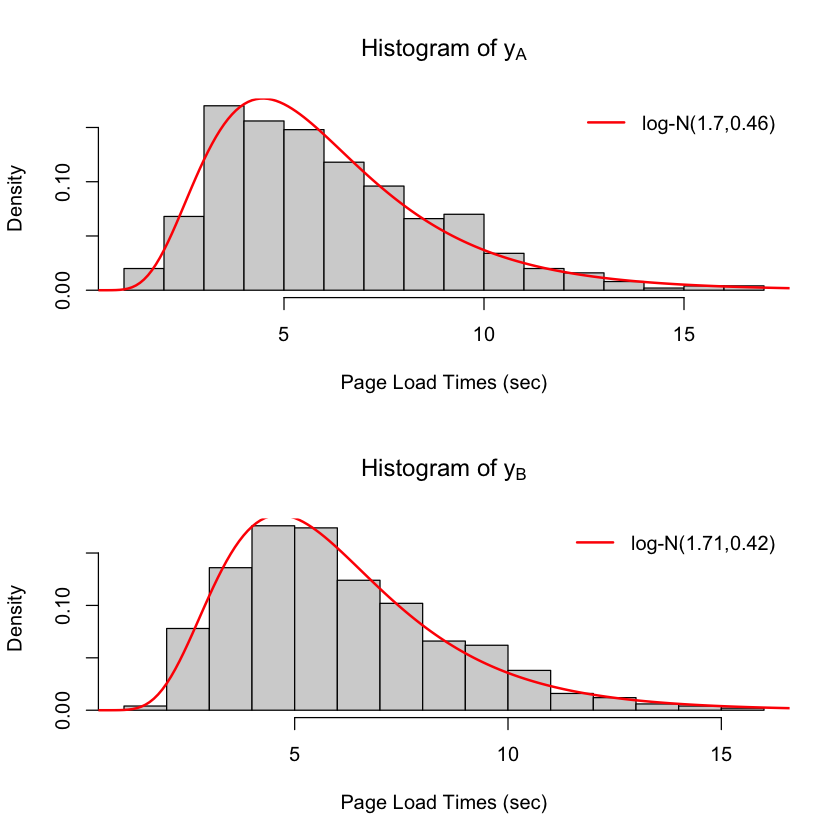

In [117]:
plt = read.csv(file = "pageloadtime.csv", header = TRUE)
yA = plt$Response[plt$Group == 1]
yB = plt$Response[plt$Group == 2]
par(mfrow = c(2,1))
hist(yA, probability = TRUE, xlab = "Page Load Times (sec)", 
     main = expression("Histogram of y"[A]), breaks = 20)
lines(x = seq(0, 20, 0.1), 
      y = dlnorm(x = seq(0, 20, 0.1), meanlog = mean(log(yA)), sdlog = sd(log(yA))),
      col = "red", lwd = 2)
legend("topright", lwd = 2, col = "red", bty = "n",
        legend = paste0("log-N(",round(mean(log(yA)),2),",",round(sd(log(yA)),2),")"))
hist(yB, probability = TRUE, xlab = "Page Load Times (sec)", 
     main = expression("Histogram of y"[B]), breaks = 20)
lines(x = seq(0, 20, 0.1), 
      y = dlnorm(x = seq(0, 20, 0.1), meanlog = mean(log(yB)), sd = sd(log(yB))),
      col = "red", lwd = 2)
legend("topright", lwd = 2, col = "red", bty = "n",
        legend = paste0("log-N(",round(mean(log(yB)),2),",",round(sd(log(yB)),2),")"))

As we see above, the page load time distributions are right-skewed and decidedly non-normal. One good model for right-skewed data is the [log-normal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution). The red curves overlayed on the histograms are maximum likelihood-fitted log-normal density curves. Their agreement with the histograms indicate that the log-normal distribution well-characterizes this data. Thus, we carry on assuming $Y|(\mu,\sigma^2)\sim \log\mathcal{N}(\mu,\sigma^2)$.

Next we'll use MCMC simulation to approximate the relevant posterior distributions. Of interest to us here are $\theta_A$ and $\theta_B$, the $90^\text{th}$ percentile of the PLT distribution in each variant, as well as their difference $\theta_A-\theta_B$. We shall again use `bayesTest()` to generate posterior draws. But unlike before, these draws come from posteriors we aren't directly interested in. In particular, they come from $(\mu, \sigma^2)|Y$. However, the $100p^\text{th}$ percentile of a log-normal distribution parameteried by $\mu$ and $\sigma^2$ is given by $$\text{exp}\left(\mu+\sigma\Phi^{-1}(p)\right)$$ where $\Phi(\cdot)$ is the standard normal CDF. We can exploit this relationship to obtain posterior draws for $\theta$ *from* the posterior draws of $(\mu, \sigma^2)$. We do this below. As usual, histograms and trace plots for the posteriors are included for diagnostic purposes.

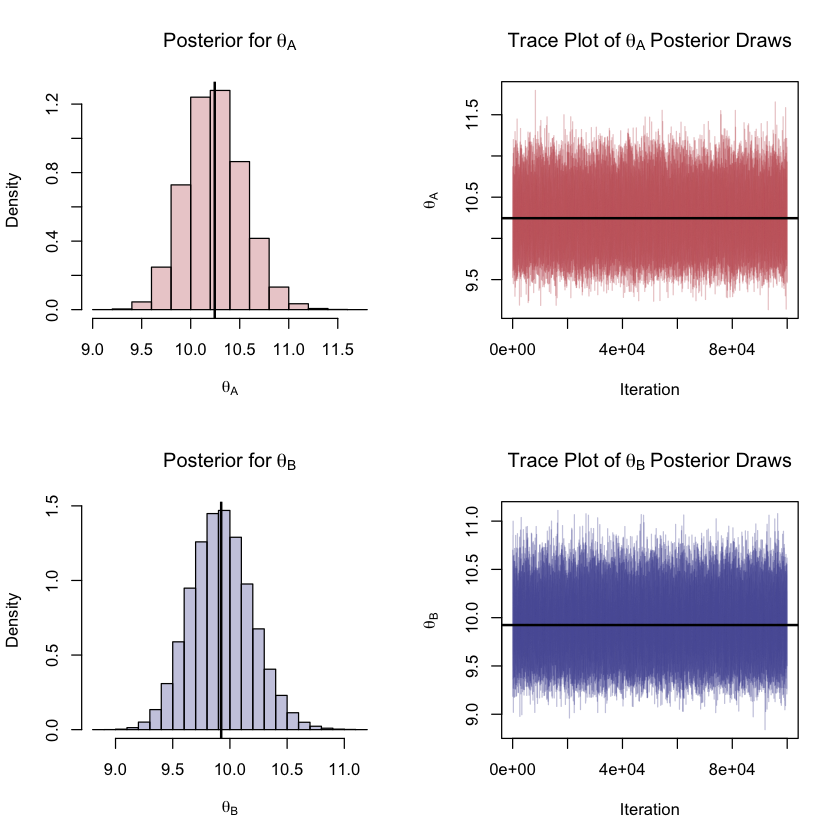

In [118]:
res = bayesTest(yA, yB, distribution = 'lognormal',
                priors = c('mu' = 5, 'lambda' = 1, 'alpha' = 3, 'beta' = 1))

muA = res$posteriors$Mu$A
sigA = sqrt(res$posteriors$Sig_Sq$A)
thetaA = exp(muA + sigA*qnorm(0.90))
muB = res$posteriors$Mu$B
sigB = sqrt(res$posteriors$Sig_Sq$B)
thetaB = exp(muB + sigB*qnorm(0.90))

par(mfrow=c(2,2))
hist(thetaA, main = expression("Posterior for"~theta[A]), probability = TRUE, 
     xlab = expression(theta[A]), col = adjustcolor("firebrick", 0.25))
abline(v = mean(thetaA), lwd = 2)
ts.plot(thetaA, main = expression("Trace Plot of"~theta[A]~"Posterior Draws"), 
        xlab = "Iteration", ylab = expression(theta[A]), col = adjustcolor("firebrick", 0.25))
abline(h = mean(thetaA), lwd = 2)
hist(thetaB, main = expression("Posterior for"~theta[B]), probability = TRUE, 
     xlab = expression(theta[B]), col = adjustcolor("navyblue", 0.25))
abline(v = mean(thetaB), lwd = 2)
ts.plot(thetaB, main = expression("Trace Plot of"~theta[B]~"Posterior Draws"), 
        xlab = "Iteration", ylab = expression(theta[B]), col = adjustcolor("navyblue", 0.25))
abline(h = mean(thetaB), lwd = 2)

As with the last example, we use `summarize_posterior()` to construct several useful posterior visualizations and leave the interpretation as an exercise.

**Exercise:** Examine the plots below and think about what they tell you. What conclusions do you draw? Do some research and try to find a hypothesis test for comparing percentiles and perform it, comparing your findings to your previous conclusions. Do they agree? Do these Bayesian summaries offer *additional* insight that the frequentist analysis does not?

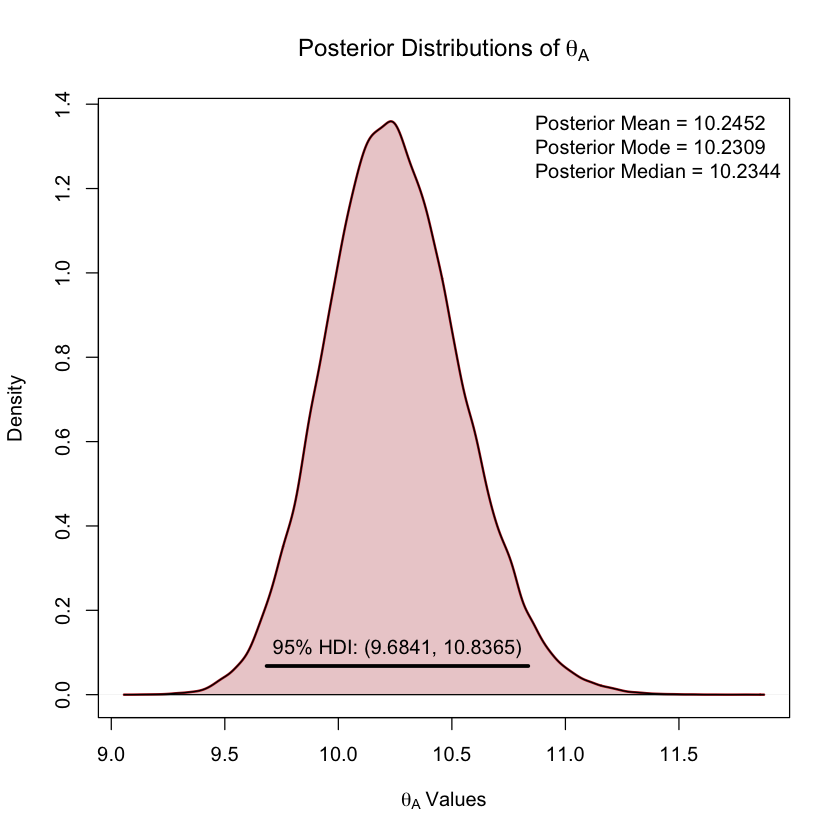

In [119]:
summarize_posterior(x = thetaA, delta = NULL, cl = 0.95, col = "firebrick", 
                    main = expression("Posterior Distributions of"~theta[A]), 
                    xlab = expression(theta[A]~"Values"), loc1 = "topright")

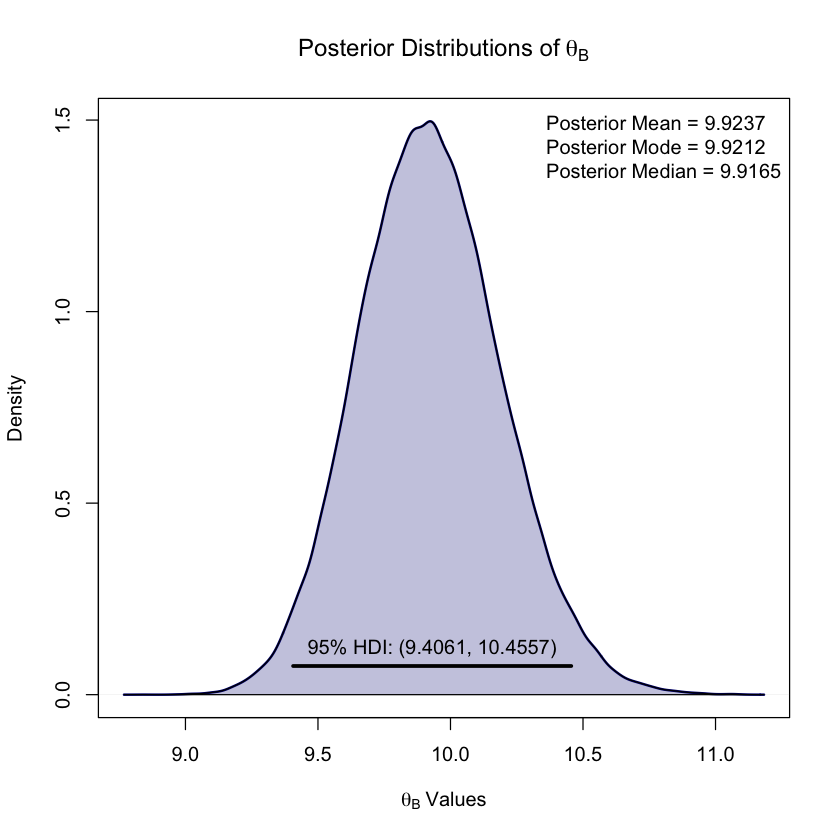

In [120]:
summarize_posterior(x = thetaB, delta = NULL, cl = 0.95, col = "navyblue", 
                    main = expression("Posterior Distributions of"~theta[B]), 
                    xlab = expression(theta[B]~"Values"), loc1 = "topright")

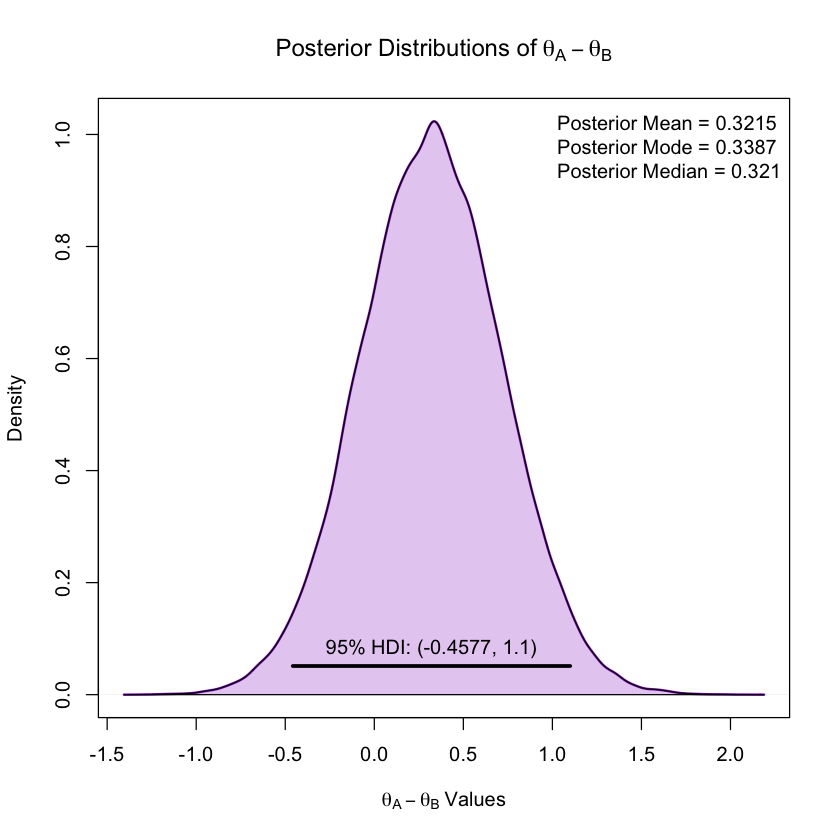

In [121]:
summarize_posterior(x = thetaA-thetaB, delta = NULL, cl = 0.95, col = "darkorchid", 
                    main = expression("Posterior Distributions of"~theta[A]-theta[B]), 
                    xlab = expression(theta[A]-theta[B]~"Values"), loc1 = "topright")

## Time Allowing...

We could also discuss:

* [Multi-armed bandits](https://onlinelibrary.wiley.com/doi/pdf/10.1002/asmb.874)

* [Sample size determination](https://rss.onlinelibrary.wiley.com/doi/pdf/10.1111/1467-9884.00082)

## Further Reading

Check out [Bayesian Data Analysis](http://www.stat.columbia.edu/~gelman/book/) by Gelman et al. Note that there is a link to a pdf of the book at that URL.